### Machine Learning Project - Predicting 30-Day Unplanned Readmissions Amongst Patients with Diabetes

In [1]:
import pandas as pd 
import numpy as np
import random
import csv 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from scipy.stats import kurtosis, skew

from matplotlib import pyplot

# min max scaler (0-1)
def normalize(min_, max_, x):
    return ( x - min_ ) / ( max_ - min_ )

In [2]:
PATH_PROCESSED_DATA = "/ML_Project/"

## Prepare Data for Machine Learning

In [219]:
df = pd.read_csv(PATH_PROCESSED_DATA + "ml_project_v4.csv", dtype=str)
print(df.shape)

(261000, 95)


In [220]:
df.groupby(['ENC_TYPE', 'readmission']).size()

ENC_TYPE  readmission
AV_TH     0              116206
CLPSED    0               66966
ED        0                6323
IP        0               47817
          1               11709
OS        0               11979
dtype: int64

In [221]:
print(df.shape)
for col in df.columns:
    print(col)

(261000, 95)
ENCOUNTERID
PATID
ADMIT_DATETIME
DISCHARGE_DATETIME
ENC_TYPE
DISCHARGE_STATUS
DX_codes
SEX
HISPANIC
RACE
loincs_results_modifier_unit
DIASTOLIC
SYSTOLIC
TOBACCO
RXNORM_CUI
age
distance
SDI_quantile
ELIXHAUSER
DX_CCS_codes
PX_CCS
n_dx
n_px
readmission
ADMIT_DURATION
prior_IP_OS_ED_count
days_since_prior_IP_OS_ED_patient_level_int
isMetropolitan
CKD
BMI
prior_other_encounter_types_count
RUCA_CODE
days_since_prior_enc_patient_level
Insulins
Glucagon-like peptide-1 (GLP-1) analogues
Biguanides
Sulfonylureas
Sulfonamides (heterocyclic)
Alpha glucosidase inhibitors
Thiazolidinediones
Dipeptidyl peptidase 4 (DPP-4) inhibitors
Sodium-glucose co-transporter 2 (SGLT2) inhibitors
Other blood glucose lowering drugs, excl. insulins
Aldose reductase inhibitors
AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM
ANTIHYPERTENSIVES
BETA BLOCKING AGENTS
CORTICOSTEROIDS FOR SYSTEMIC USE
LIPID MODIFYING AGENTS
ENC_TYPE_ED
ENC_TYPE_OS
ENC_TYPE_AV_TH
ENC_TYPE_IP
ENC_TYPE_CLPSED
DISCHARGE_STATUS_HO
DI

In [222]:
for col in df.columns:
    if col not in ['ENCOUNTERID', 'PATID']:  # Exclude 'ENCOUTNERID' and 'PATID'
        print(col)
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
        print("\n")

ADMIT_DATETIME
Value counts for ADMIT_DATETIME:
2019-05-14    236
2020-01-14    225
2018-04-23    221
2020-02-18    218
2019-02-05    218
             ... 
2017-12-10     19
2017-09-02     19
2017-01-07     19
2017-12-17     18
2017-04-23     15
Name: ADMIT_DATETIME, Length: 2087, dtype: int64


DISCHARGE_DATETIME
Value counts for DISCHARGE_DATETIME:
2020-01-14    241
2019-05-14    234
2019-12-20    222
2020-01-29    221
2017-09-27    220
             ... 
2019-09-02     15
2018-08-26     15
2017-06-18     15
2018-04-15     12
2016-12-18     12
Name: DISCHARGE_DATETIME, Length: 2087, dtype: int64


ENC_TYPE
Value counts for ENC_TYPE:
AV_TH     116206
CLPSED     66966
IP         59526
OS         11979
ED          6323
Name: ENC_TYPE, dtype: int64


DISCHARGE_STATUS
Value counts for DISCHARGE_STATUS:
CLPSED    185667
HO         37611
HH         23803
SN_RH      10390
AM          3529
Name: DISCHARGE_STATUS, dtype: int64


DX_codes
Value counts for DX_codes:
E119                          

0.454058591951301;0.5135154117446382;-0.542333310651504;-0.3903980047662575;-0.05399325282655629;0.09768171103574226;-0.196577551684768;-0.0926695586280875;0.09600258752768448;-0.02676205000285753;-0.031865380065617684;-0.011036848455900741;-0.011057369710936987;-0.03043874013931775;0.012294710394281212;-0.015659223243249334;-0.013290584424426133;-0.013447216475806614;0.00306995689345962;0.0064825083245017975;0.004522095391013558;-0.034384759738822525;0.008631674555324;-0.018959842010930487;0.01553724240489866;-0.00406660785864019;0.01063232003281384;-0.005397828748006686;-0.005061907114238116;0.00915209629563946;-0.00720897198445565;-0.004854299472792299;-0.003765526279378407;-0.001669888833724003;-0.05451413713297122;-0.0014339933094934356;0.05342873476878359;-0.03458303703632831;-0.014093513534310254;-0.016102351683328645;0.0002945136436494172;-0.00486900627000197;0.004365314079091331;0.011603407138276534;0.0028241038812501875;0.001630181622802242;-0.01086252825614975;0.009892192723

1.0       258216
2.0         1432
3+          1075
CLPSED       277
Name: RUCA_CODE, dtype: int64


days_since_prior_enc_patient_level
Value counts for days_since_prior_enc_patient_level:
0.1944116489571035     31825
0.19480519480519481    19914
0.1951987406532861     13226
0.19559228650137742    11943
0.19716646989374262    11889
                       ...  
0.6564344746162928         1
0.6694214876033058         1
0.17079889807162535        1
0.5308933490751673         1
0.1822117276662731         1
Name: days_since_prior_enc_patient_level, Length: 1374, dtype: int64


Insulins
Value counts for Insulins:
0    159561
1    101439
Name: Insulins, dtype: int64


Glucagon-like peptide-1 (GLP-1) analogues
Value counts for Glucagon-like peptide-1 (GLP-1) analogues:
0    252029
1      8971
Name: Glucagon-like peptide-1 (GLP-1) analogues, dtype: int64


Biguanides
Value counts for Biguanides:
0    218700
1     42300
Name: Biguanides, dtype: int64


Sulfonylureas
Value counts for Sulfonylureas

In [223]:
# Drop columns because no occurrences for each medication for all encounters
print(df.shape)
df.drop(columns=['Sulfonamides (heterocyclic)'], inplace=True)
df.drop(columns=['Aldose reductase inhibitors'], inplace=True)
print(df.shape)

(261000, 95)
(261000, 93)


In [187]:
columns = ['ENCOUNTERID', 'PATID', 'ADMIT_DATETIME', 'DISCHARGE_DATETIME', 
           'ENC_TYPE_ED', 'ENC_TYPE_OS', 'ENC_TYPE_AV_TH', 'ENC_TYPE_IP', 'ENC_TYPE_CLPSED',
           'DISCHARGE_STATUS_HO', 'DISCHARGE_STATUS_HH', 'DISCHARGE_STATUS_SN_RH', 'DISCHARGE_STATUS_AM', 'DISCHARGE_STATUS_CLPSED',
           'SEX_F', 'SEX_M', 'HISPANIC_N', 'HISPANIC_Y', 'HISPANIC_CLPSED',
           'RACE_01_02_04', 'RACE_03', 'RACE_05', 'RACE_CLPSED', 'TOBACCO_01', 'TOBACCO_02', 'TOBACCO_03', 'TOBACCO_CLPSED',
           'SDI_quantile_0', 'SDI_quantile_1', 'SDI_quantile_2', 'SDI_quantile_3', 'SDI_quantile_4',
           'isMetropolitan_0.0', 'isMetropolitan_1.0', 'isMetropolitan_CLPSED', 'CKD_0', 'CKD_1', 'CKD_2', 'CKD_3', 'CKD_4', 'CKD_5',
           'BMI_<18.5', 'BMI_18.5 – 24.9', 'BMI_25.0 – 29.9', 'BMI_30.0+', 'BMI_CLPSED',
           'RUCA_CODE_1.0', 'RUCA_CODE_2.0', 'RUCA_CODE_3+', 'RUCA_CODE_CLPSED',
           'days_since_prior_enc_patient_level', 'days_since_prior_IP_OS_ED_patient_level_int', 'prior_IP_OS_ED_count' , 'prior_other_encounter_types_count',
           'loincs_results_modifier_unit', 'DIASTOLIC', 'SYSTOLIC', 
           'n_dx', 'n_px', 'DX_CCS_codes', 'PX_CCS',
           'age', 'ELIXHAUSER', 'distance',
           'Insulins', 'Glucagon-like peptide-1 (GLP-1) analogues', 'Biguanides', 'Sulfonylureas', 'Alpha glucosidase inhibitors', 'Thiazolidinediones',
           'Dipeptidyl peptidase 4 (DPP-4) inhibitors', 'Sodium-glucose co-transporter 2 (SGLT2) inhibitors', 'Other blood glucose lowering drugs, excl. insulins',
           'AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM', 'ANTIHYPERTENSIVES', 'BETA BLOCKING AGENTS', 'CORTICOSTEROIDS FOR SYSTEMIC USE', 'LIPID MODIFYING AGENTS',
           'readmission', 'ADMIT_DURATION']


 
for col in columns:
    print(col)
    print(df[col].unique())

ENCOUNTERID
['TEMPLE63025039' 'TEMPLE93601259' 'TEMPLE58999755' ... 'TEMPLE67576767'
 'TEMPLE67697879' 'TEMPLE94033795']
PATID
['700000015' '700000021' '700000022' ... '700131263' '700131264'
 '700131271']
ADMIT_DATETIME
['2018-06-12' '2020-02-19' '2022-08-26' ... '2018-12-02' '2020-04-12'
 '2018-11-04']
DISCHARGE_DATETIME
['2018-06-12' '2020-02-19' '2022-08-29' ... '2021-03-07' '2019-06-02'
 '2022-05-08']
ENC_TYPE_ED
['0.0' '1.0']
ENC_TYPE_OS
['1.0' '0.0']
ENC_TYPE_AV_TH
['0.0' '1.0']
ENC_TYPE_IP
['0.0' '1.0']
ENC_TYPE_CLPSED
['0.0' '1.0']
DISCHARGE_STATUS_HO
['1.0' '0.0']
DISCHARGE_STATUS_HH
['0.0' '1.0']
DISCHARGE_STATUS_SN_RH
['0.0' '1.0']
DISCHARGE_STATUS_AM
['0.0' '1.0']
DISCHARGE_STATUS_CLPSED
['0.0' '1.0']
SEX_F
['1.0' '0.0']
SEX_M
['0.0' '1.0']
HISPANIC_N
['1.0' '0.0']
HISPANIC_Y
['0.0' '1.0']
HISPANIC_CLPSED
['0.0' '1.0']
RACE_01_02_04
['0.0' '1.0']
RACE_03
['1.0' '0.0']
RACE_05
['0.0' '1.0']
RACE_CLPSED
['0.0' '1.0']
TOBACCO_01
['0.0' '1.0']
TOBACCO_02
['1.0' '0.0']
TOBACCO_

['9.814158025278349e-14;0.8738250583796399;-0.2587902082253013;0.02911465408364761;-0.024124124964544188;0.19995412162344584;0.25918546262782344;-0.05170885546808983;0.07674656174838689;0.003007690998438625'
 '1.0000000000000022;-1.9334471923953614e-14;2.4715585750673793e-12;7.841953222460665e-12;7.775804219593284e-14;1.253546464268918e-11;-4.39428222602171e-12;-1.0854287437564256e-12;3.0901394955195186e-12;4.7439933090372836e-12'
 '1.6207238812329318e-14;0.7755923432336514;-0.22117806583157837;0.031037722732838877;-0.2395772436897599;-0.022183209031859746;-0.02348559002943833;0.021273594161773563;-0.011834847260798682;-0.034364347688803164'
 ...
 '5.2659482369072025e-14;0.9856515691685074;0.2027526846600784;-0.4443526120800659;-0.08746818934473005;-0.24318070525534166;-0.04694060503938307;-0.027511503756659998;0.25462262646390343;0.022456300156653685'
 '5.3998605859802746e-14;0.9816562310830844;0.21093173710950242;-0.4474952896717537;-0.10473805235373898;-0.21837162848092403;-0.051957

['0.0015503875968992248' '0.0012919896640826874' '0.03875968992248062'
 '0.01731266149870801' '0.00025839793281653745' '0.0010335917312661498'
 '0.02635658914728682' '0.026873385012919897' '0.0007751937984496124'
 '0.018604651162790697' '0.029198966408268735' '0.0020671834625322996'
 '0.016537467700258397' '0.004134366925064599' '0.003359173126614987'
 '0.0005167958656330749' '0.0018087855297157622' '0.002583979328165375'
 '0.04186046511627907' '0.002842377260981912' '0.008785529715762274'
 '0.013953488372093023' '0.01317829457364341' '0.005426356589147287' '0.0'
 '0.004651162790697674' '0.002325581395348837' '0.01937984496124031'
 '0.009560723514211887' '0.010077519379844961' '0.3772609819121447'
 '0.0031007751937984496' '0.007235142118863049' '0.04237726098191214'
 '0.0036175710594315244' '0.004392764857881137' '0.01524547803617571'
 '0.00516795865633075' '0.026614987080103358' '0.012403100775193798'
 '0.014470284237726097' '0.019896640826873386' '0.019638242894056846'
 '0.0413436692

In [188]:
df = df[columns]

df.shape

(261000, 80)

In [189]:
# find length of each encounter

len( ','.join(list(map(str,df.iloc[0].values.tolist()))).replace(';',',').split(',') )

221

In [190]:
df['ADMIT_DURATION'] = df['ADMIT_DURATION'].fillna(0)

In [191]:
# TRAIN SVD


visits = df[ ['ENC_TYPE_ED', 'ENC_TYPE_OS', 'ENC_TYPE_AV_TH', 'ENC_TYPE_IP', 'ENC_TYPE_CLPSED',
           'DISCHARGE_STATUS_HO', 'DISCHARGE_STATUS_HH', 'DISCHARGE_STATUS_SN_RH', 'DISCHARGE_STATUS_AM', 'DISCHARGE_STATUS_CLPSED',
           'SEX_F', 'SEX_M', 'HISPANIC_N', 'HISPANIC_Y', 'HISPANIC_CLPSED',
           'RACE_01_02_04', 'RACE_03', 'RACE_05', 'RACE_CLPSED', 'TOBACCO_01', 'TOBACCO_02', 'TOBACCO_03', 'TOBACCO_CLPSED',
           'SDI_quantile_0', 'SDI_quantile_1', 'SDI_quantile_2', 'SDI_quantile_3', 'SDI_quantile_4',
           'isMetropolitan_0.0', 'isMetropolitan_1.0', 'isMetropolitan_CLPSED', 'CKD_0', 'CKD_1', 'CKD_2', 'CKD_3', 'CKD_4', 'CKD_5',
           'BMI_<18.5', 'BMI_18.5 – 24.9', 'BMI_25.0 – 29.9', 'BMI_30.0+', 'BMI_CLPSED',
           'RUCA_CODE_1.0', 'RUCA_CODE_2.0', 'RUCA_CODE_3+', 'RUCA_CODE_CLPSED',
           'days_since_prior_enc_patient_level', 'days_since_prior_IP_OS_ED_patient_level_int', 'prior_IP_OS_ED_count' , 'prior_other_encounter_types_count',
           'loincs_results_modifier_unit', 'DIASTOLIC', 'SYSTOLIC', 
           'n_dx', 'n_px', 'DX_CCS_codes', 'PX_CCS',
           'age', 'ELIXHAUSER', 'distance',
           'Insulins', 'Glucagon-like peptide-1 (GLP-1) analogues', 'Biguanides', 'Sulfonylureas', 'Thiazolidinediones',
           'Dipeptidyl peptidase 4 (DPP-4) inhibitors', 'Sodium-glucose co-transporter 2 (SGLT2) inhibitors', 'Other blood glucose lowering drugs, excl. insulins', 
           'AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM', 'ANTIHYPERTENSIVES', 'BETA BLOCKING AGENTS', 'CORTICOSTEROIDS FOR SYSTEMIC USE', 'LIPID MODIFYING AGENTS',
           'ADMIT_DURATION'] ].values.tolist() # encounterid, patid, discharge_datetime, admit_datetime removed


c = 0
for v in range(len(visits)):
    
    if c % 500_000 == 0: print(c)
    c+=1
    
    for i in range(len(visits[v])):
        visits[v][i] = str(visits[v][i]).replace(';', ',')
        if '=' in visits[v][i]:
            visits[v][i] = str(visits[v][i]).replace('=', '')
        if 's' in visits[v][i]:
            visits[v][i] = str(visits[v][i]).replace('s', '')
 
            
        
    visits[v] = np.asarray(','.join(visits[v]).split(','), dtype=np.float64)
    
print("converting to numpy array...")
visits = np.asarray(visits, dtype=np.float64)
print(visits.shape)

0
converting to numpy array...
(261000, 215)



Applying SVD with 10 components...
Explained variance with 10 components: 44.59%

Applying SVD with 20 components...
Explained variance with 20 components: 60.01%

Applying SVD with 30 components...
Explained variance with 30 components: 68.93%

Applying SVD with 40 components...
Explained variance with 40 components: 75.21%

Applying SVD with 50 components...
Explained variance with 50 components: 79.97%

Applying SVD with 60 components...
Explained variance with 60 components: 83.82%

Applying SVD with 70 components...
Explained variance with 70 components: 86.83%

Applying SVD with 80 components...
Explained variance with 80 components: 89.29%

Applying SVD with 90 components...
Explained variance with 90 components: 91.33%


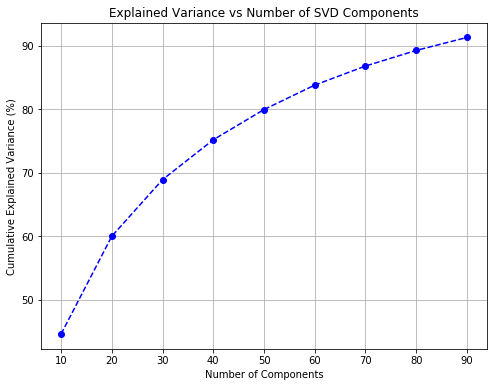

In [192]:
import matplotlib.pyplot as plt
n_components_list = [10, 20, 30, 40, 50, 60, 70, 80, 90]
explained_variance = []  # To store the explained variance for each n_components

# Loop over each value of n_components
for n in n_components_list:
    print(f"\nApplying SVD with {n} components...")
    svd = TruncatedSVD(n_components=n)
    svd.fit(visits)
    explained_variance.append(svd.explained_variance_ratio_.sum())  # Cumulative explained variance
    print(f"Explained variance with {n} components: {svd.explained_variance_ratio_.sum() * 100:.2f}%")

# Plot the cumulative explained variance for different n_components
plt.figure(figsize=(8, 6))
plt.plot(n_components_list, np.array(explained_variance) * 100, marker='o', linestyle='--', color='b')
plt.title("Explained Variance vs Number of SVD Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.grid(True)
plt.xticks(n_components_list)  # Ensure we have ticks for each value of n_components
plt.show()

In [193]:
print("Train SVD...")
svd = TruncatedSVD(n_components=70)
transformed = svd.fit(visits)

print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())

Train SVD...
[0.01449956 0.14640625 0.05705854 0.05053609 0.03783935 0.03516236
 0.02811937 0.02697372 0.02533098 0.02399252 0.02159322 0.0205004
 0.01744028 0.01713502 0.01511802 0.01391028 0.01317832 0.01227642
 0.01188456 0.01120549 0.01076081 0.0103168  0.00949375 0.00933677
 0.00912812 0.00879413 0.00875807 0.0081697  0.00739286 0.00725883
 0.0068839  0.00678872 0.00660149 0.00650915 0.00629242 0.00614282
 0.00606177 0.00590281 0.00584514 0.00571972 0.00558723 0.00515163
 0.0049988  0.00479314 0.00472132 0.00471334 0.0046435  0.00455177
 0.00441634 0.00434922 0.00424297 0.00416871 0.00403261 0.00398834
 0.00387594 0.00376507 0.00371819 0.00368202 0.0034947  0.00341904
 0.00332807 0.00321689 0.00312232 0.00306279 0.00303616 0.00294856
 0.0028615  0.00276123 0.00260983 0.00258565]
0.868165408096469


In [194]:
import pandas as pd

# Ensure 'readmission' is of integer type
df['readmission'] = pd.to_numeric(df['readmission'], errors='coerce').fillna(0).astype(int)

# Check the dtype after conversion
print(f"readmission dtype: {df['readmission'].dtype}")

# Convert 'ADMIT_DATETIME' to datetime format
df['ADMIT_DATETIME'] = pd.to_datetime(df['ADMIT_DATETIME'], errors='coerce')

# Check if there are any errors in conversion
if df['ADMIT_DATETIME'].isnull().any():
    print("Some ADMIT_DATETIME values could not be converted to datetime.")

# Create binary encoding for 'ENC_TYPE_IP'
IP_encoded = df['ENC_TYPE_IP'] == '1.0'

# Verify the result
print(f"Number of IP encounters: {IP_encoded.sum()}")
print(f"Number of non-IP encounters: {(~IP_encoded).sum()}")
df['ENC_TYPE_IP'].value_counts()

readmission dtype: int64
Number of IP encounters: 59526
Number of non-IP encounters: 201474


0.0    201474
1.0     59526
Name: ENC_TYPE_IP, dtype: int64

In [195]:
print(df['readmission'].dtype)
print(df['ENC_TYPE_IP'].dtype)

int64
object


In [196]:
df['ENC_TYPE_IP'] = pd.to_numeric(df['ENC_TYPE_IP'], errors='coerce')
print(df['ENC_TYPE_IP'].value_counts())

0.0    201474
1.0     59526
Name: ENC_TYPE_IP, dtype: int64


In [197]:
print(df.columns.isna().sum())

0


In [198]:
df.shape

(261000, 80)

In [199]:
import random
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Define the dataset date range
start_date = pd.to_datetime('2016-12-15')
end_date = pd.to_datetime('2022-09-30')

# Initialize an empty list to store the visit counts for each patient
visit_counts = []

columns = ['ENC_TYPE_ED', 'ENC_TYPE_OS', 'ENC_TYPE_AV_TH', 'ENC_TYPE_IP', 'ENC_TYPE_CLPSED',
           'DISCHARGE_STATUS_HO', 'DISCHARGE_STATUS_HH', 'DISCHARGE_STATUS_SN_RH', 'DISCHARGE_STATUS_AM', 'DISCHARGE_STATUS_CLPSED',
           'SEX_F', 'SEX_M', 'HISPANIC_N', 'HISPANIC_Y', 'HISPANIC_CLPSED',
           'RACE_01_02_04', 'RACE_03', 'RACE_05', 'RACE_CLPSED', 'TOBACCO_01', 'TOBACCO_02', 'TOBACCO_03', 'TOBACCO_CLPSED',
           'SDI_quantile_0', 'SDI_quantile_1', 'SDI_quantile_2', 'SDI_quantile_3', 'SDI_quantile_4',
           'isMetropolitan_0.0', 'isMetropolitan_1.0', 'isMetropolitan_CLPSED', 'CKD_0', 'CKD_1', 'CKD_2', 'CKD_3', 'CKD_4', 'CKD_5',
           'BMI_<18.5', 'BMI_18.5 – 24.9', 'BMI_25.0 – 29.9', 'BMI_30.0+', 'BMI_CLPSED',
           'RUCA_CODE_1.0', 'RUCA_CODE_2.0', 'RUCA_CODE_3+', 'RUCA_CODE_CLPSED',
           'days_since_prior_enc_patient_level', 'days_since_prior_IP_OS_ED_patient_level_int', 'prior_IP_OS_ED_count' , 'prior_other_encounter_types_count',
           'loincs_results_modifier_unit', 'DIASTOLIC', 'SYSTOLIC', 
           'n_dx', 'n_px', 'DX_CCS_codes', 'PX_CCS',
           'age', 'ELIXHAUSER', 'distance',
           'Insulins', 'Glucagon-like peptide-1 (GLP-1) analogues', 'Biguanides', 'Sulfonylureas', 'Thiazolidinediones',
           'Dipeptidyl peptidase 4 (DPP-4) inhibitors', 'Sodium-glucose co-transporter 2 (SGLT2) inhibitors', 'Other blood glucose lowering drugs, excl. insulins', 
           'AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM', 'ANTIHYPERTENSIVES', 'BETA BLOCKING AGENTS', 'CORTICOSTEROIDS FOR SYSTEMIC USE', 'LIPID MODIFYING AGENTS',
            'ADMIT_DURATION']  # Encounter-specific columns

# Initialize list to collect transformed patient data
data = []

# Convert `ENC_TYPE_IP` column to numeric (if necessary)
# df['ENC_TYPE_IP'] = pd.to_numeric(df['ENC_TYPE_IP'], errors='coerce')

# Iterate through the dataframe grouped by patient ID (PATID)
c = 0
for patid, rows in df.groupby("PATID"):
    if c % 10_000 == 0:
        print(f"Processing patient {c} with PATID: {patid}")
    c += 1
    
    random.seed(42)  # Ensure reproducibility
    patient_data = rows.reset_index(drop=True)
    
    # Check if the patient has been readmitted
    readmission_indices = patient_data.index[patient_data['readmission'] == 1].tolist()
    IP_indices = patient_data.index[patient_data['ENC_TYPE_IP'] == 1].tolist()  # Now using numeric 1
    
    # Debugging messages
#     if len(readmission_indices) > 0:
#         print(f"Patient {patid} - Readmission indices: {readmission_indices}")
#     if len(IP_indices) > 0:
#         print(f"Patient {patid} - IP encounter indices: {IP_indices}")
    
    # ==========================================================================================
    # CASE 1: No readmission, pick IP encounter and create 2-year window
    # ==========================================================================================
    if len(readmission_indices) == 0:
#         print(f"Patient {patid} - No readmission found. Selecting IP encounter at random.")
        
        if not IP_indices:
            print(f"Patient {patid} has no IP encounters! Skipping.")
            continue  # Skip this patient if no IP encounter is available
        
        random_IP_indx = random.choice(IP_indices)  # Randomly select an IP encounter
        max_date = patient_data.iloc[random_IP_indx]['ADMIT_DATETIME']
        min_date = max_date - pd.DateOffset(years=2)  # Define the 2-year window
        
        # If the lookback window extends beyond the available data range, skip this patient
        if min_date < start_date:
#             print(f"Patient {patid} - Lookback window extends before {start_date}. Skipping patient.")
            continue  # Skip this patient

        min_date = max(min_date, start_date)  # Enforce the earliest date constraint
        
        # Create the patient data window within the 2-year range
        patient_window = patient_data[
            (patient_data['ADMIT_DATETIME'] >= min_date) & (patient_data['ADMIT_DATETIME'] <= max_date)
        ]
        
#         print(f"Patient {patid} - Window for IP encounter created from {min_date} to {max_date}.")
#         print(f"Patient {patid} - Number of visits in this window: {len(patient_window)}")
        
        # Track the number of visits for this patient
        visit_counts.append(len(patient_window))  # Store the visit count for this patient
        
        
        sample = []
        visit_count = 0
        for indx, row in patient_window.iterrows():
            visit = row[columns].values.tolist()
            visit = [str(v).replace(';', ',').replace('=', '').replace('s', '') for v in visit]
            visit = ','.join(visit).split(',')
            visit = np.asarray(visit, dtype=np.float64)
#             print(f"Before SVD: Visit shape: {visit.shape}")
            
            # Apply SVD transformation to each visit
            visit = visit.reshape(1, -1)
            visit = svd.transform(visit)
#             print(f"After SVD: Visit shape: {visit.shape}")
            # Debugging: Print transformed visit data
#             print(f"Patient {patid} - Transformed visit shape: {visit.shape}")
            
            sample.extend(visit.flatten())
            visit_count += 1
        
        # Add label for no readmission (0)
        sample.extend([0])
        data.append(sample)
        expected_length = visit_count * 70 + 1
        if len(sample) != expected_length:
            print(f"Patient {patid} has incorrect sample length:")
            print(f"  Expected length: {expected_length}, Actual length: {len(sample)}")
            print(f"  Number of visits: {visit_count}")
            print(f"  Sample: {sample[:5]}...")  # Print the first few values of the sample for inspection

    
    # ==========================================================================================
    # CASE 2: Yes readmission, select the last IP before readmission, create 2-year window
    # ==========================================================================================
    elif len(readmission_indices) >= 1:
#         print(f"Patient {patid} - Readmission found. Selecting IP encounter before readmission.")
        
        random_RE_indx = random.choice(readmission_indices)  # Select a random readmission
        max_indx_IP = next((i for i, idx in enumerate(IP_indices) if idx > random_RE_indx), None)
        
        if max_indx_IP is None:
#             print(f"Patient {patid} - No IP encounter found before readmission. Skipping.")
            continue  # Skip if no IP encounter before readmission
        
        max_indx_IP = IP_indices[max_indx_IP - 1]  # Ensure we have the last IP encounter before the readmission
        max_date = patient_data.iloc[max_indx_IP]['ADMIT_DATETIME']
        min_date = max_date - pd.DateOffset(years=2)
        
        # If the lookback window extends beyond the available data range, skip this patient
        if min_date < start_date:
#             print(f"Patient {patid} - Lookback window extends before {start_date}. Skipping patient.")
            continue  # Skip this patient

        min_date = max(min_date, start_date)  # Enforce the earliest date constraint
        
        # Create patient window for the 2-year period
        patient_window = patient_data[
            (patient_data['ADMIT_DATETIME'] >= min_date) & (patient_data['ADMIT_DATETIME'] <= max_date)
        ]
        
#         print(f"Patient {patid} - Window for IP encounter created from {min_date} to {max_date}.")
#         print(f"Patient {patid} - Number of visits in this window: {len(patient_window)}")
        
        # Track the number of visits for this patient
        visit_counts.append(len(patient_window))  # Store the visit count for this patient
        
        sample = []
        visit_count = 0
        for indx, row in patient_window.iterrows():
            visit = row[columns].values.tolist()
            visit = [str(v).replace(';', ',').replace('=', '').replace('s', '') for v in visit]
            visit = ','.join(visit).split(',')
            visit = np.asarray(visit, dtype=np.float64)
#             print(f"Before SVD: Visit shape: {visit.shape}")
            # Apply SVD transformation to each visit
            visit = visit.reshape(1, -1)
            visit = svd.transform(visit)
#             print(f"After SVD: Visit shape: {visit.shape}")
            # Debugging: Print transformed visit data
#             print(f"Patient {patid} - Transformed visit shape: {visit.shape}")
            
    
            visit = visit.flatten()  # Flatten the visit
#             print(f"Flattened visit shape: {visit.shape}")  # This should be (70,)
            sample.extend(visit)  # Append the flattened visit to the sample
            visit_count += 1
        
        # Add label for readmission (1)
        sample.extend([1])
        # Check the length of the full sample
#         print(f"Sample length for patient {patid}: {len(sample)}")  # Should be (n * 70 + 1)
        data.append(sample)
    
        expected_length = visit_count * 70 + 1
        if len(sample) != expected_length:
            print(f"Patient {patid} has incorrect sample length:")
            print(f"  Expected length: {expected_length}, Actual length: {len(sample)}")
            print(f"  Number of visits: {visit_count}")
            print(f"  Sample: {sample[:5]}...")  # Print the first few values of the sample for inspection


# Final debugging message
print(f"Total number of samples processed: {len(data)}")

# Calculate the average number of visits
average_visits = np.mean(visit_counts)
print(f"Average number of visits per patient in the 2-year window: {average_visits:.2f}")

Processing patient 0 with PATID: 700000015
Processing patient 10000 with PATID: 700047495
Processing patient 20000 with PATID: 700095448
Total number of samples processed: 15852
Average number of visits per patient in the 2-year window: 4.05


In [200]:
print(len(data), "X", len(data[3]))

15852 X 71


In [88]:
# # Print the shape of the data list
# print(f"Total number of samples processed: {len(data)}")

# # Print the shapes of individual patient's encounter arrays and labels
# for i, (encounters, label) in enumerate(data):
#     print(f"Sample {i}: Encounters shape = {encounters.shape}, Label shape = {label.shape}")

# # Optionally, print the shape of the first few samples to verify
# for i in range(min(5, len(data))):
#     encounters, label = data[i]
#     print(f"Sample {i}: Encounters shape = {encounters.shape}, Label shape = {label.shape}")
#     print(f"Label: {label}")


Total number of samples processed: 15852
Sample 0: Encounters shape = (70, 1), Label shape = (1,)
Sample 1: Encounters shape = (70, 6), Label shape = (1,)
Sample 2: Encounters shape = (70, 6), Label shape = (1,)
Sample 3: Encounters shape = (70, 1), Label shape = (1,)
Sample 4: Encounters shape = (70, 1), Label shape = (1,)
Sample 5: Encounters shape = (70, 1), Label shape = (1,)
Sample 6: Encounters shape = (70, 3), Label shape = (1,)
Sample 7: Encounters shape = (70, 1), Label shape = (1,)
Sample 8: Encounters shape = (70, 3), Label shape = (1,)
Sample 9: Encounters shape = (70, 9), Label shape = (1,)
Sample 10: Encounters shape = (70, 1), Label shape = (1,)
Sample 11: Encounters shape = (70, 1), Label shape = (1,)
Sample 12: Encounters shape = (70, 1), Label shape = (1,)
Sample 13: Encounters shape = (70, 1), Label shape = (1,)
Sample 14: Encounters shape = (70, 1), Label shape = (1,)
Sample 15: Encounters shape = (70, 9), Label shape = (1,)
Sample 16: Encounters shape = (70, 7), La

Sample 4445: Encounters shape = (70, 1), Label shape = (1,)
Sample 4446: Encounters shape = (70, 1), Label shape = (1,)
Sample 4447: Encounters shape = (70, 1), Label shape = (1,)
Sample 4448: Encounters shape = (70, 4), Label shape = (1,)
Sample 4449: Encounters shape = (70, 1), Label shape = (1,)
Sample 4450: Encounters shape = (70, 10), Label shape = (1,)
Sample 4451: Encounters shape = (70, 2), Label shape = (1,)
Sample 4452: Encounters shape = (70, 1), Label shape = (1,)
Sample 4453: Encounters shape = (70, 1), Label shape = (1,)
Sample 4454: Encounters shape = (70, 1), Label shape = (1,)
Sample 4455: Encounters shape = (70, 1), Label shape = (1,)
Sample 4456: Encounters shape = (70, 1), Label shape = (1,)
Sample 4457: Encounters shape = (70, 1), Label shape = (1,)
Sample 4458: Encounters shape = (70, 1), Label shape = (1,)
Sample 4459: Encounters shape = (70, 1), Label shape = (1,)
Sample 4460: Encounters shape = (70, 1), Label shape = (1,)
Sample 4461: Encounters shape = (70, 1)

Sample 8810: Encounters shape = (70, 2), Label shape = (1,)
Sample 8811: Encounters shape = (70, 22), Label shape = (1,)
Sample 8812: Encounters shape = (70, 2), Label shape = (1,)
Sample 8813: Encounters shape = (70, 1), Label shape = (1,)
Sample 8814: Encounters shape = (70, 5), Label shape = (1,)
Sample 8815: Encounters shape = (70, 7), Label shape = (1,)
Sample 8816: Encounters shape = (70, 1), Label shape = (1,)
Sample 8817: Encounters shape = (70, 10), Label shape = (1,)
Sample 8818: Encounters shape = (70, 32), Label shape = (1,)
Sample 8819: Encounters shape = (70, 1), Label shape = (1,)
Sample 8820: Encounters shape = (70, 6), Label shape = (1,)
Sample 8821: Encounters shape = (70, 5), Label shape = (1,)
Sample 8822: Encounters shape = (70, 1), Label shape = (1,)
Sample 8823: Encounters shape = (70, 7), Label shape = (1,)
Sample 8824: Encounters shape = (70, 1), Label shape = (1,)
Sample 8825: Encounters shape = (70, 2), Label shape = (1,)
Sample 8826: Encounters shape = (70, 

Sample 13343: Encounters shape = (70, 2), Label shape = (1,)
Sample 13344: Encounters shape = (70, 1), Label shape = (1,)
Sample 13345: Encounters shape = (70, 1), Label shape = (1,)
Sample 13346: Encounters shape = (70, 9), Label shape = (1,)
Sample 13347: Encounters shape = (70, 1), Label shape = (1,)
Sample 13348: Encounters shape = (70, 1), Label shape = (1,)
Sample 13349: Encounters shape = (70, 1), Label shape = (1,)
Sample 13350: Encounters shape = (70, 1), Label shape = (1,)
Sample 13351: Encounters shape = (70, 1), Label shape = (1,)
Sample 13352: Encounters shape = (70, 1), Label shape = (1,)
Sample 13353: Encounters shape = (70, 1), Label shape = (1,)
Sample 13354: Encounters shape = (70, 2), Label shape = (1,)
Sample 13355: Encounters shape = (70, 6), Label shape = (1,)
Sample 13356: Encounters shape = (70, 1), Label shape = (1,)
Sample 13357: Encounters shape = (70, 2), Label shape = (1,)
Sample 13358: Encounters shape = (70, 1), Label shape = (1,)
Sample 13359: Encounters

In [201]:
import csv
import numpy as np

# Save numpy arrays to a binary file (using .npy or .npz format)
np.save(PATH_PROCESSED_DATA + "testing_discharge_preprocessed_ML_allLabs_70_components.npy", data)

/data/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [3]:
file_path = PATH_PROCESSED_DATA + "testing_discharge_preprocessed_ML_allLabs_70_components.npy"

# Load the numpy array from the file with allow_pickle=True
data = np.load(file_path, allow_pickle=True)

print(data.shape)  # Optionally check the shape of the loaded data

(15852,)


In [226]:
# how many 0 and how many 1

y = []

for i in data:
    
    y.append( int(i[-1]) )

np.unique(np.asarray(y), return_counts=True)

# data:  (array([0, 1]), array([27511,  9130]))
# data_: 

(array([0, 1]), array([14000,  1852]))

In [227]:
# get maximum length of a sample 

n_last_visits = (70 * 100) + 1 # (70 features per visit * last x visits) + 1 (label)

    
n_features = 70 * 100

sample_lengths = []
data_ = []

# remove patients who have more than 9000 features (outliers)
for i in data:
    
    # if len(i[0:-1]) <= 10020:
    #     data_.append(i)
       
    x = i[-n_last_visits: ] # last x visits
    sample_lengths.append( len(x) )
#     data_.append(x)


print("min:", np.min(np.asarray(sample_lengths)), "max:", np.max(np.asarray(sample_lengths)))
np.unique(np.asarray(sample_lengths), return_counts=True)

min: 71 max: 6161


(array([  71,  141,  211,  281,  351,  421,  491,  561,  631,  701,  771,
         841,  911,  981, 1051, 1121, 1191, 1261, 1331, 1401, 1471, 1541,
        1611, 1681, 1751, 1821, 1891, 1961, 2031, 2101, 2171, 2241, 2311,
        2381, 2451, 2521, 2591, 2661, 2731, 2801, 2871, 2941, 3011, 3081,
        3151, 3221, 3291, 3361, 3431, 3501, 3571, 3851, 3921, 4061, 4131,
        4201, 4341, 5181, 5251, 6161]),
 array([7415, 2677, 1305,  776,  533,  447,  341,  297,  237,  209,  195,
         163,  155,  135,  117,   97,   85,   70,   82,   54,   51,   49,
          40,   36,   27,   38,   21,   17,   16,   21,   16,   16,   12,
          14,   11,   10,    6,    3,    9,    2,    3,    5,    2,    6,
           2,    3,    5,    2,    1,    1,    1,    4,    2,    3,    1,
           2,    1,    1,    1,    1]))

In [228]:
import numpy as np


sample_lengths = []

# Append all sample lengths to the list 
for i in data:
    x = i[-n_last_visits:]  # Last n_last_visits features 
    sample_lengths.append(len(x))

# Convert sample_lengths to a numpy array for easier manipulation
sample_lengths = np.asarray(sample_lengths)

# Calculate Q1, Q3, and IQR
Q1 = np.percentile(sample_lengths, 25)  # First quartile (25th percentile)
Q3 = np.percentile(sample_lengths, 75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = sample_lengths[(sample_lengths < lower_bound) | (sample_lengths > upper_bound)]

print(f"Outlier thresholds: Lower bound = {lower_bound}, Upper bound = {upper_bound}")
print(f"Number of outliers: {len(outliers)}")
print(f"Outlier values: {outliers}")

# remove outliers from data_ (filtered data) by checking lengths
data_filtered = [i for i in data if len(i) >= lower_bound and len(i) <= upper_bound]

print(f"Number of samples after filtering: {len(data_filtered)}")

Outlier thresholds: Lower bound = -244.0, Upper bound = 596.0
Number of outliers: 2061
Outlier values: [ 631  631  911 ...  631  911 1121]
Number of samples after filtering: 13791


In [229]:
data_ = data_filtered

In [230]:
len(data_)

13791

In [231]:
###### get maximum length of a sample 
# first, run the code without the if condition and append to data_ to determine max length 

n_last_visits = (70 * 8) + 1 # (70 features per visit * last x visits) + 1 (label)

    
n_features = 70 * 8

sample_lengths = []

# remove patients who have more than 9000 features (outliers)
for i in data_:
    
    # if len(i[0:-1]) <= 10020:
    #     data_.append(i)
       
    x = i[-n_last_visits: ] # last x visits
    sample_lengths.append( len(x) )
#     data_.append(x)


print("min:", np.min(np.asarray(sample_lengths)), "max:", np.max(np.asarray(sample_lengths)))
np.unique(np.asarray(sample_lengths), return_counts=True)

min: 71 max: 561


(array([ 71, 141, 211, 281, 351, 421, 491, 561]),
 array([7415, 2677, 1305,  776,  533,  447,  341,  297]))

In [232]:
# unify dimensions by padding with 0's

# 8 visits * 70 per visit = 561 feautes

X = []
y = []

c = 0
for row in data_:
    
    if c%1000 == 0: print(c)
    c+=1
     
    y_ = row[-1]
    x = row[0:-1]
    
    x.extend( [0.0] * ( n_features - (len(x) ) ) )
    
    x = np.asarray(x, dtype=np.float64)
    X.append(x)
    y.append( int(y_) )

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


In [233]:
X = np.array(X)  # Convert the list of feature vectors into a numpy array
y = np.array(y)  # Convert the list of labels into a numpy array

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (13791, 560)
Shape of y: (13791,)


In [234]:
X[0].shape

(560,)

In [235]:
np.save(PATH_PROCESSED_DATA+"Discharge_70_X.npy", X)
np.save(PATH_PROCESSED_DATA+"Discharge_70_y.npy", y)

In [3]:
import numpy as np

X_path = PATH_PROCESSED_DATA + "Discharge_70_X.npy"
y_path = PATH_PROCESSED_DATA + "Discharge_70_y.npy"

# Load the data from the .npy files
X = np.load(X_path)  # Loading the features
y = np.load(y_path)  # Loading the labels

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([2475,  284]))

In [6]:
#Import necessary libraries
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
# from keras.layers import Dense, Activation
# from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils import get_file
import numpy as np
import random
import sys
import io
import numpy as np
import pandas as pd

import random
from matplotlib import pyplot as plt
# plt.style.use('dark_background')
from keras.models import Model

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D, GRU, Bidirectional, Input, TimeDistributed, Reshape

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from sklearn.metrics import matthews_corrcoef

### Model Testing CNN

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_54 (Conv1D)          (None, 8, 64)             22464     
                                                                 
 max_pooling1d_54 (MaxPoolin  (None, 4, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_55 (Conv1D)          (None, 4, 128)            41088     
                                                                 
 max_pooling1d_55 (MaxPoolin  (None, 2, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_56 (Conv1D)          (None, 2, 256)            164096    
                                                                 
 max_pooling1d_56 (MaxPoolin  (None, 1, 256)         

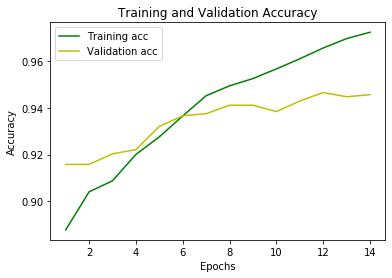

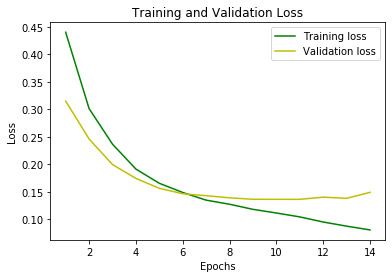

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix


n_features = 70 * 8


# Hyperparameters and model configurations
learning_rate = 0.0002
batch_size = 256
epochs = 14
patience = 4  # Early stopping patience

# Ensure that X_train and X_test are numpy arrays of shape (num_samples, 8, 70)
X_train_ = np.array(X_train)
X_test_ = np.array(X_test)
y_train_ = np.array(y_train)
y_test_ = np.array(y_test)

# Reshape the data to match the input shape (num_samples, 8, 70)
X_train_reshaped = np.reshape(X_train_, (-1, 8, 70))
X_test_reshaped = np.reshape(X_test_, (-1, 8, 70))

# Define the CNN model architecture
cnn_model = Sequential()

# Add convolutional layers with kernel size of 5
cnn_model.add(Conv1D(64, 5, activation='relu', padding='same', input_shape=(8, 70)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(128, 5, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(256, 5, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(2))

# Dropout layer to prevent overfitting
cnn_model.add(Dropout(0.2))

# Flatten the output of the Conv1D layers to feed into Dense layers
cnn_model.add(Flatten())

# Add a Dense layer for the final classification output
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the CNN model with Adam optimizer and binary crossentropy loss
cnn_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check layers and output shape
cnn_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True, verbose=1)

# Training the model
print('Training...')
history = cnn_model.fit(
    X_train_reshaped,
    y_train_,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[early_stopping]  # Add early stopping callback here
)

# Evaluate the model on test data
print(cnn_model.evaluate(X_test_reshaped, y_test_), "\n\n")

# Prediction
y_pred_cnn_proba = cnn_model.predict(X_test_reshaped)
y_pred_cnn = (y_pred_cnn_proba > 0.5).astype("int32")

# Evaluate metrics
print("ROC AUC SCORE", roc_auc_score(y_test_, y_pred_cnn_proba))

metrics_cnn = precision_recall_fscore_support(y_test_, y_pred_cnn, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test_, y_pred_cnn).ravel()
specificity = tn / (tn + fp)

print("precision", metrics_cnn[0])
print("recall", metrics_cnn[1])
print("F1 score", metrics_cnn[2])
print("specificity", specificity)

# Plotting training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Model Testing LSTM

Number of hidden units:  64 Dropout:  0.1
Training...
Epoch 1/14
39/39 [==============================] - 4s 31ms/step - loss: 0.4893 - accuracy: 0.8990 - val_loss: 0.3765 - val_accuracy: 0.9158
Epoch 2/14
39/39 [==============================] - 0s 10ms/step - loss: 0.3183 - accuracy: 0.9073 - val_loss: 0.2425 - val_accuracy: 0.9212
Epoch 3/14
39/39 [==============================] - 0s 10ms/step - loss: 0.2068 - accuracy: 0.9243 - val_loss: 0.1613 - val_accuracy: 0.9348
Epoch 4/14
39/39 [==============================] - 0s 10ms/step - loss: 0.1525 - accuracy: 0.9420 - val_loss: 0.1333 - val_accuracy: 0.9511
Epoch 5/14
39/39 [==============================] - 0s 10ms/step - loss: 0.1342 - accuracy: 0.9465 - val_loss: 0.1265 - val_accuracy: 0.9502
Epoch 6/14
39/39 [==============================] - 0s 10ms/step - loss: 0.1259 - accuracy: 0.9492 - val_loss: 0.1237 - val_accuracy: 0.9511
Epoch 7/14
39/39 [==============================] - 0s 10ms/step - loss: 0.1194 - accuracy: 0.9531 -

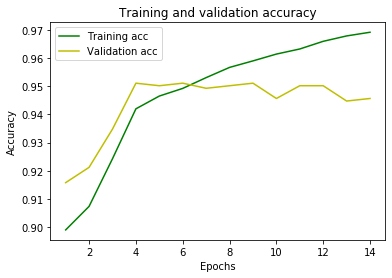

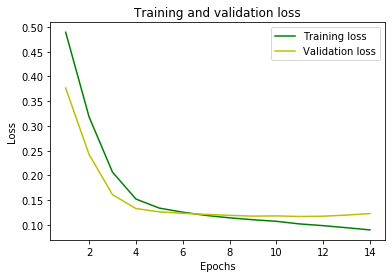

In [33]:
# try 1 way LSTM
# Random search drop out rate and number of units/neurons

# 8 visits * 70 feattures per visit = 560

# # Hyperparameters and model configurations
# learning_rate = 0.001
# units = 64  # Number of LSTM units
# dropout = 0.2  # Dropout for CNN
# lstm_dropout = 0.1  # Dropout for LSTM
# batch_size = 256
# epochs = 14
# kernel_size = 5
# filters_list = [64, 128, 256]  # Filters for CNN
# cnn_architecture = [64, 128, 256]  # CNN layers configuration
# patience = 4  # Early stopping patience


n_features = 70 * 8


X_train_ = np.array(X_train)
X_test_ = np.array(X_test)
y_train_ = np.array(y_train)
y_test_ = np.array(y_test)

input_shape = (X_train.shape[1], 1)

units = 64

lstm_model = Sequential()
lstm_model.add(Reshape((8, 70), input_shape=(n_features,)))

lstm_model.add(Masking(mask_value=0.0)) 

# 1 sees the past 
# 2 sees the past and the future

dropout = 0.1
print('Number of hidden units: ', units, 'Dropout: ', dropout)
lstm_model.add(LSTM(units, input_shape=input_shape)) # 64, $128$, 256, 512
lstm_model.add(Dropout(dropout))

# model.add(Dense(50, activation='sigmoid'))

lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print('Training...')
history = lstm_model.fit(
    X_train_,
    y_train_,
    batch_size = 256, # 512
    epochs = 14,
    validation_split = 0.1,
    #class_weight=class_weights
)

# Evaluate the model on test data
print(lstm_model.evaluate(X_test_, y_test_), "\n\n")

# Prediction
y_pred_cnn_proba = lstm_model.predict(X_test_)
y_pred_cnn = (y_pred_cnn_proba > 0.5).astype("int32")

# Evaluate metrics
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix

print("ROC AUC SCORE", roc_auc_score(y_test_, y_pred_cnn_proba))

metrics_cnn = precision_recall_fscore_support(y_test_, y_pred_cnn, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test_, y_pred_cnn).ravel()
specificity = tn / (tn + fp)

print("precision", metrics_cnn[0])
print("recall", metrics_cnn[1])
print("F1 score", metrics_cnn[2])
print("specificity", specificity)


plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1) #?
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

87/87 [==============================] - 0s 2ms/step


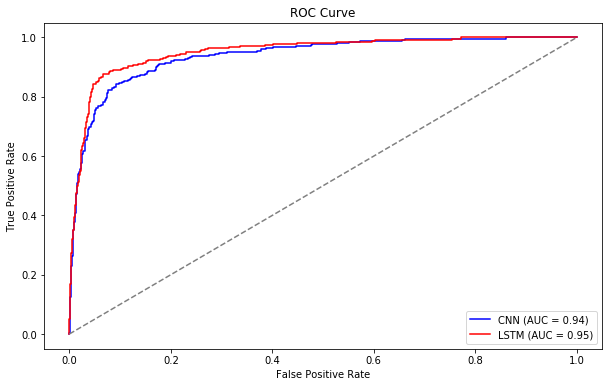

In [34]:
# ========================= Evaluation and ROC Curve ==========================
# For CNN predictions
y_pred_cnn_proba = cnn_model.predict(X_test_reshaped)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_, y_pred_cnn_proba)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# For LSTM predictions
y_pred_lstm_proba = lstm_model.predict(X_test_)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_, y_pred_lstm_proba)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_cnn, tpr_cnn, color='blue', label=f'CNN (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_lstm, tpr_lstm, color='red', label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Model Testing CNN and LSTM Separate then Merge

In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix, accuracy_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Reshape, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define input shape: 8 time steps, 70 features
input_shape = (8, 70)

# Ensure the data is reshaped to match the input shape
X_train_reshaped = np.reshape(X_train, (-1, 8, 70))
X_test_reshaped = np.reshape(X_test, (-1, 8, 70))
y_train_ = np.array(y_train)
y_test_ = np.array(y_test)


n_features = 70 * 8

# Hyperparameters and model configurations
learning_rate = 0.001
units = 64  # Number of LSTM units
dropout = 0.2  # Dropout for CNN
lstm_dropout = 0.1  # Dropout for LSTM
batch_size = 256
epochs = 14
kernel_size = 5
filters_list = [64, 128, 256]  # Filters for CNN
cnn_architecture = [64, 128, 256]  # CNN layers configuration
patience = 4  # Early stopping patience

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5)

# Lists to store metrics across folds
combined_preds = []  # Store combined predictions for ROC calculation
y_true = []  # Store true labels for ROC curve
cnn_preds = []  # Store CNN predictions for ROC curve
lstm_preds = []  # Store LSTM predictions for ROC curve

# Lists to store average accuracy and loss for plotting
all_cnn_accuracy = []
all_cnn_val_accuracy = []
all_lstm_accuracy = []
all_lstm_val_accuracy = []
all_cnn_loss = []
all_cnn_val_loss = []
all_lstm_loss = []
all_lstm_val_loss = []

# Define EarlyStopping with patience
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True, verbose=1)

# Cross-validation loop for different architectures
for filters in filters_list:
    print(f"\nTraining with CNN filters: {filters}, LSTM units: {units}, Dropout: {dropout}, Epochs: {epochs}")

    # Cross-validation fold loop
    for fold_num, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train_, X_test_ = X[train_index], X[test_index]
        y_train_, y_test_ = y[train_index], y[test_index]

        # CNN Model
        cnn_model_ = Sequential()
        cnn_model_.add(Reshape((8, 70), input_shape=(X_train_.shape[1], 1)))

        # Add layers based on the CNN architecture
        for f in cnn_architecture:
            cnn_model_.add(Conv1D(f, kernel_size, activation='relu', padding='same'))
            cnn_model_.add(MaxPooling1D(2))

        cnn_model_.add(Dropout(dropout))
        cnn_model_.add(Flatten())
        cnn_model_.add(Dense(1, activation='sigmoid'))
        cnn_model_.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

        # Train CNN model
        history_cnn = cnn_model_.fit(X_train_, y_train_, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0, callbacks=[early_stopping])

        cnn_pred = cnn_model_.predict(X_test_)
        cnn_pred_binary = (cnn_pred > 0.5).astype("int32")

        # Store CNN predictions for ROC curve
        cnn_preds.extend(cnn_pred)

        # Save CNN fold history
        all_cnn_accuracy.append(history_cnn.history['accuracy'])
        all_cnn_val_accuracy.append(history_cnn.history['val_accuracy'])
        all_cnn_loss.append(history_cnn.history['loss'])
        all_cnn_val_loss.append(history_cnn.history['val_loss'])

        # LSTM Model
        lstm_model_ = Sequential()
        lstm_model_.add(Reshape((8, 70), input_shape=(X_train_.shape[1],)))
        lstm_model_.add(Masking(mask_value=0.0))
        lstm_model_.add(LSTM(units, dropout=lstm_dropout))
        lstm_model_.add(Dropout(dropout))
        lstm_model_.add(Dense(1, activation='sigmoid'))
        lstm_model_.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

        # Train LSTM model
        history_lstm = lstm_model_.fit(X_train_, y_train_, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0, callbacks=[early_stopping])

        lstm_pred = lstm_model_.predict(X_test_)
        lstm_pred_binary = (lstm_pred > 0.5).astype("int32")

        # Store LSTM predictions for ROC curve
        lstm_preds.extend(lstm_pred)

        # Save LSTM fold history
        all_lstm_accuracy.append(history_lstm.history['accuracy'])
        all_lstm_val_accuracy.append(history_lstm.history['val_accuracy'])
        all_lstm_loss.append(history_lstm.history['loss'])
        all_lstm_val_loss.append(history_lstm.history['val_loss'])

        # Averaging predictions
        combined_pred_proba = (cnn_pred + lstm_pred) / 2
        combined_pred_binary = (combined_pred_proba > 0.5).astype("int32")

        # Store the true labels and predicted probabilities for ROC curve calculation
        combined_preds.extend(combined_pred_proba)  # Store predicted probabilities
        y_true.extend(y_test_)  # Store true labels

        # Evaluate metrics
        roc_auc = roc_auc_score(y_test_, combined_pred_proba)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test_, combined_pred_binary, average='weighted')
        tn, fp, fn, tp = confusion_matrix(y_test_, combined_pred_binary).ravel()
        specificity = tn / (tn + fp)
        accuracy = accuracy_score(y_test_, combined_pred_binary)

        print(f"Fold {fold_num} - ROC AUC: {roc_auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
              f"F1: {f1:.4f}, Specificity: {specificity:.4f}, Accuracy: {accuracy:.4f}")

    # After all folds, calculate average metrics for plotting
    avg_cnn_accuracy = np.mean(all_cnn_accuracy, axis=0)
    avg_cnn_val_accuracy = np.mean(all_cnn_val_accuracy, axis=0)
    avg_lstm_accuracy = np.mean(all_lstm_accuracy, axis=0)
    avg_lstm_val_accuracy = np.mean(all_lstm_val_accuracy, axis=0)
    avg_cnn_loss = np.mean(all_cnn_loss, axis=0)
    avg_cnn_val_loss = np.mean(all_cnn_val_loss, axis=0)
    avg_lstm_loss = np.mean(all_lstm_loss, axis=0)
    avg_lstm_val_loss = np.mean(all_lstm_val_loss, axis=0)


Training with CNN filters: 64, LSTM units: 64, Dropout: 0.2, Epochs: 14
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 14: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 - ROC AUC: 0.9667, Precision: 0.9494, Recall: 0.9471, F1: 0.9481, Specificity: 0.9659, Accuracy: 0.9471
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 - ROC AUC: 0.9557, Precision: 0.9425, Recall: 0.9434, F1: 0.9430, Specificity: 0.9707, Accuracy: 0.9434
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 - ROC AUC: 0.9565, Precision: 0.9450, Recall: 0.9413, F1: 0.9428, Specificity: 0.9607, Accuracy: 0.9413
Restoring model weights from the end of the best

/data/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 - ROC AUC: 0.9695, Precision: 0.9480, Recall: 0.9471, F1: 0.9475, Specificity: 0.9687, Accuracy: 0.9471
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 - ROC AUC: 0.9613, Precision: 0.9422, Recall: 0.9420, F1: 0.9421, Specificity: 0.9675, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 - ROC AUC: 0.9578, Precision: 0.9464, Recall: 0.9442, F1: 0.9451, Specificity: 0.9647, Accuracy: 0.9442
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 - ROC AUC: 0.9693, Precision: 0.9504, Recall: 0.9489, F1: 0.9496, Specificity: 0.9683, Accuracy: 0.9489
Restoring mo

/data/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 - ROC AUC: 0.9685, Precision: 0.9485, Recall: 0.9464, F1: 0.9473, Specificity: 0.9659, Accuracy: 0.9464
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 - ROC AUC: 0.9563, Precision: 0.9396, Recall: 0.9398, F1: 0.9397, Specificity: 0.9671, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 - ROC AUC: 0.9572, Precision: 0.9466, Recall: 0.9456, F1: 0.9461, Specificity: 0.9679, Accuracy: 0.9456
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 - ROC AUC: 0.9684, Precision: 0.9471, Recall: 0.9471, F1: 0.9471, Specificity: 0.9707, Accuracy: 0.9471
Restoring mo

/data/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


87/87 [==============================] - 1s 2ms/step


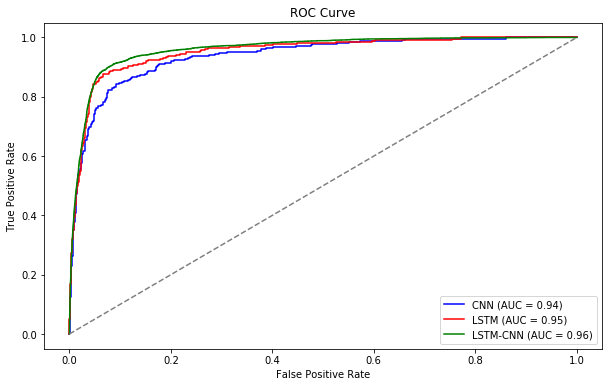

In [35]:
# ========================= Evaluation and ROC Curve ==========================
# For CNN predictions
y_pred_cnn_proba = cnn_model.predict(X_test_reshaped)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_, y_pred_cnn_proba)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# For LSTM predictions
y_pred_lstm_proba = lstm_model.predict(X_test_reshaped)  # Get predicted probabilities for LSTM
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_, y_pred_lstm_proba)  # ROC curve for LSTM
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)  # Calculate AUC for LSTM

# For Combined Model (LSTM + CNN)
fpr_cnn_lstm, tpr_cnn_lstm, _ = roc_curve(y_true, combined_preds)  # ROC curve for combined model
roc_auc_cnn_lstm = auc(fpr_cnn_lstm, tpr_cnn_lstm)  # Calculate AUC for combined model

# ========================= Plot ROC Curve ==========================
plt.figure(figsize=(10, 6))

# Plot ROC curve for CNN
plt.plot(fpr_cnn, tpr_cnn, color='blue', label=f'CNN (AUC = {roc_auc_cnn:.2f})')

# Plot ROC curve for LSTM
plt.plot(fpr_lstm, tpr_lstm, color='red', label=f'LSTM (AUC = {roc_auc_lstm:.2f})')

# Plot ROC curve for Combined (LSTM + CNN)
plt.plot(fpr_cnn_lstm, tpr_cnn_lstm, color='green', label=f'LSTM-CNN (AUC = {roc_auc_cnn_lstm:.2f})')

# Plot a diagonal line representing random guesses
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add legend to identify each model
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [38]:
learning_rate = 0.001 

# CNN MODEL
X_train_ = np.array(X_train)
X_test_ = np.array(X_test)
y_train_ = np.array(y_train)
y_test_ = np.array(y_test)


# Define input shape: 8 visits, 70 features
input_shape = (X_train_.shape[1], 1)  # (8, 70)

# Define the model architecture
cnn_model = Sequential()

# Reshape the input if necessary (but it might already be in the right shape)
cnn_model.add(Reshape((8, 70), input_shape=input_shape))  # No change, just making sure it's the right shape

# Convolutional layer (1D) - 64 filters, kernel size 3, ReLU activation
cnn_model.add(Conv1D(64, 3, activation='relu', padding='same'))  # Padding 'same' keeps output shape same as input

# Max pooling layer
cnn_model.add(MaxPooling1D(2))  # Pooling with size 2, reducing the dimensionality

# Second Convolutional Layer - 128 filters, kernel size 3
cnn_model.add(Conv1D(128, 3, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(2))  # Another pooling layer

# Dropout to prevent overfitting
cnn_model.add(Dropout(0.2))

# Flatten the output to feed into the Dense layers
cnn_model.add(Flatten())

# Dense layer for classification (binary output)
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# Learning Rate: 0.001
# Units in LSTM Layer: 64
# Dropout Rate: 0.2 (for CNN layers), 0.1 (for LSTM layer)
# Batch Size: 256
# Epochs: 14
# Kernel Size: 5
# Filters: 64, 128, 256 (for the CNN layers)
# Patience: 4 (for early stopping to avoid overfitting)

units = 128

lstm_model = Sequential()
lstm_model.add(Reshape((8, 70), input_shape=(n_features,)))

lstm_model.add(Masking(mask_value=0.0)) 

# 1 sees the past 
# 2 sees the past and the future

dropout = 0.1
print('Number of hidden units: ', units, 'Dropout: ', dropout)
lstm_model.add(LSTM(units, input_shape=input_shape)) # 64, $128$, 256, 512
lstm_model.add(Dropout(dropout))

# model.add(Dense(50, activation='sigmoid'))

lstm_model.add(Dense(1, activation='sigmoid'))


# Compile the LSTM model with the Adam optimizer and custom learning rate
lstm_model.compile(
    optimizer=Adam(learning_rate=learning_rate),  # Use Adam optimizer with specified learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history_cnn = cnn_model.fit(X_train_, y_train_, batch_size=512, epochs=14, validation_split=0.1)
cnn_pred = cnn_model.predict(X_test_)
cnn_pred_binary = (cnn_pred > 0.5).astype("int32")


history_lstm = lstm_model.fit(X_train_, y_train_, batch_size=512, epochs=14, validation_split=0.1)
lstm_pred = lstm_model.predict(X_test_)
lstm_pred_binary = (lstm_pred > 0.5).astype("int32")


from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix

# Averaging predictions
combined_pred_proba = (cnn_pred + lstm_pred) / 2
combined_pred_binary = (combined_pred_proba > 0.5).astype("int32")

# Evaluate metrics
print("ROC AUC SCORE", roc_auc_score(y_test_, combined_pred_proba))

metrics_combined = precision_recall_fscore_support(y_test_, combined_pred_binary, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test_, combined_pred_binary).ravel()
specificity = tn / (tn + fp)

print("precision", metrics_combined[0])
print("recall", metrics_combined[1])
print("F1 score", metrics_combined[2])
print("specificity", specificity)


Number of hidden units:  128 Dropout:  0.1
Epoch 1/14
20/20 [==============================] - 1s 13ms/step - loss: 0.4196 - accuracy: 0.8684 - val_loss: 0.2762 - val_accuracy: 0.9167
Epoch 2/14
20/20 [==============================] - 0s 6ms/step - loss: 0.2590 - accuracy: 0.9096 - val_loss: 0.2160 - val_accuracy: 0.9194
Epoch 3/14
20/20 [==============================] - 0s 6ms/step - loss: 0.2062 - accuracy: 0.9163 - val_loss: 0.1872 - val_accuracy: 0.9248
Epoch 4/14
20/20 [==============================] - 0s 6ms/step - loss: 0.1779 - accuracy: 0.9264 - val_loss: 0.1707 - val_accuracy: 0.9284
Epoch 5/14
20/20 [==============================] - 0s 6ms/step - loss: 0.1611 - accuracy: 0.9328 - val_loss: 0.1605 - val_accuracy: 0.9357
Epoch 6/14
20/20 [==============================] - 0s 7ms/step - loss: 0.1466 - accuracy: 0.9397 - val_loss: 0.1549 - val_accuracy: 0.9366
Epoch 7/14
20/20 [==============================] - 0s 6ms/step - loss: 0.1389 - accuracy: 0.9449 - val_loss: 0.1500

In [39]:
print("X_test_ shape:", X_test_.shape)
print("y_test_ shape:", y_test_.shape)



# Print their shapes
print("CNN Predictions shape:", cnn_pred.shape)
print("LSTM Predictions shape:", lstm_pred.shape)


print("y_test shape:", len(y_test))
print("combined_pred_proba shape:", len(combined_pred_proba))


X_test_ shape: (2759, 560)
y_test_ shape: (2759,)
CNN Predictions shape: (2759, 1)
LSTM Predictions shape: (2759, 1)
y_test shape: 2759
combined_pred_proba shape: 2759


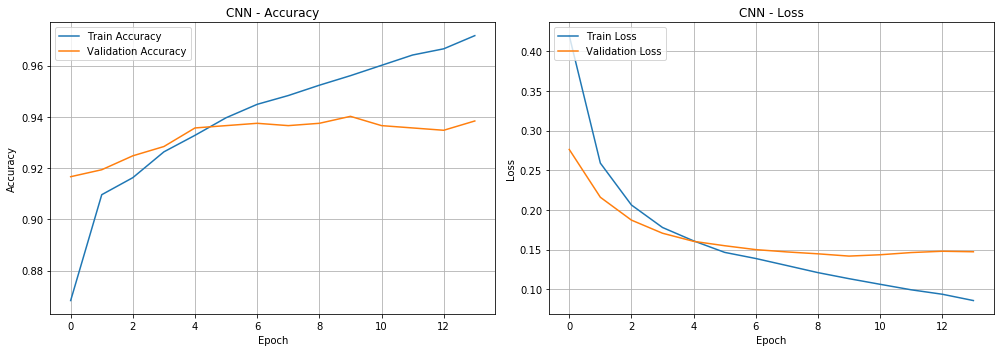

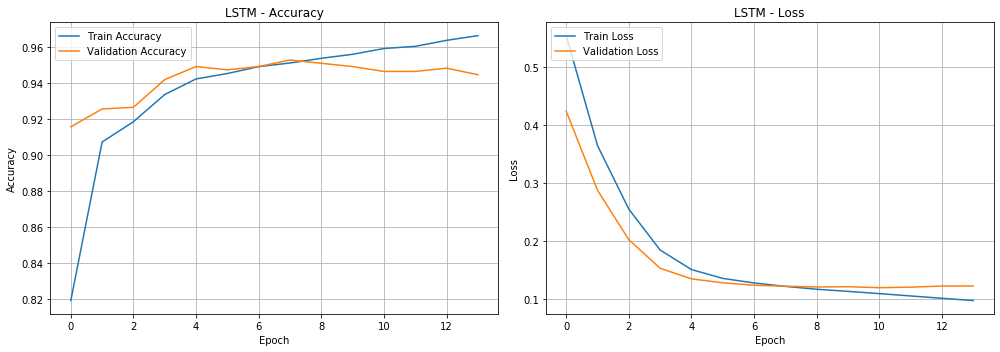

In [40]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    """
    Plots the training and validation accuracy and loss for the given model.
    
    Parameters:
    - history: The history object returned from the `fit` function of the model.
    - model_name: A string representing the model name (e.g., "CNN" or "LSTM") for the title.
    """
    # Plot training & validation accuracy and loss values
    plt.figure(figsize=(14, 5))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot CNN history
plot_training_history(history_cnn, model_name='CNN')

# Plot LSTM history
plot_training_history(history_lstm, model_name='LSTM')

### Testing with Different Hyperparameter Combinations

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Reshape, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from itertools import product


# Hyperparameter search space
learning_rates = [0.001, 0.0001]
units_list = [64, 128]
dropout_list = [0.1, 0.2]
batch_sizes = [256, 512]
epochs_list = [10, 14]  # Number of epochs for early stopping
kernel_sizes = [3, 5]  # Kernel sizes for CNN
filters_list = [64, 128]  # Number of filters in CNN
lstm_dropout_list = [0.1, 0.3]  # Dropout for LSTM
patience_list = [2, 4]  # Early stopping patience values

# CNN Architecture Variations
cnn_architectures = [
    [64, 128],  # Simple architecture with 2 Conv1D layers
    [64, 128, 256],  # Deeper architecture with 3 Conv1D layers
    [64, 128, 256, 512],  # Even deeper with 4 Conv1D layers
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Cross-validation loop for different hyperparameters and CNN architectures
for learning_rate, units, dropout, batch_size, epochs, kernel_size, filters, lstm_dropout, patience, cnn_architecture in product(
        learning_rates, units_list, dropout_list, batch_sizes, epochs_list, kernel_sizes, filters_list, lstm_dropout_list, patience_list, cnn_architectures):

    print(f"\nTraining with hyperparameters: LR={learning_rate}, Units={units}, Dropout={dropout}, BatchSize={batch_size}, "
          f"Epochs={epochs}, KernelSize={kernel_size}, Filters={filters}, LSTM_Dropout={lstm_dropout}, Patience={patience}, CNN Architecture={cnn_architecture}")

    # Initialize metrics for the current hyperparameter set
    roc_auc_scores = []
    precisions = []
    recalls = []
    f1_scores = []
    specificities = []
    accuracies = []  # List to store accuracy for each fold

    # Initialize StratifiedKFold
    for fold_num, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train_, X_test_ = X[train_index], X[test_index]
        y_train_, y_test_ = y[train_index], y[test_index]

        # CNN Model with variable architecture
        input_shape = (X_train_.shape[1], 1)
        cnn_model = Sequential()
        cnn_model.add(Reshape((8, 70), input_shape=input_shape))

        # Add layers based on the CNN architecture being tested
        for f in cnn_architecture:
            cnn_model.add(Conv1D(f, kernel_size, activation='relu', padding='same'))
            cnn_model.add(MaxPooling1D(1))
        
        cnn_model.add(Dropout(0.2))
        cnn_model.add(Flatten())
        cnn_model.add(Dense(1, activation='sigmoid'))
        cnn_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

        # LSTM Model
        lstm_model = Sequential()
        lstm_model.add(Reshape((8, 70), input_shape=(X_train_.shape[1],)))
        lstm_model.add(Masking(mask_value=0.0))
        lstm_model.add(LSTM(units, dropout=lstm_dropout))
        lstm_model.add(Dropout(dropout))
        lstm_model.add(Dense(1, activation='sigmoid'))
        lstm_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

        # Early stopping callback
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True, verbose=1)

        # Train CNN model
        cnn_model.fit(X_train_, y_train_, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0, callbacks=[early_stopping])
        cnn_pred = cnn_model.predict(X_test_)
        cnn_pred_binary = (cnn_pred > 0.5).astype("int32")

        # Train LSTM model
        lstm_model.fit(X_train_, y_train_, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0, callbacks=[early_stopping])
        lstm_pred = lstm_model.predict(X_test_)
        lstm_pred_binary = (lstm_pred > 0.5).astype("int32")

        # Averaging predictions
        combined_pred_proba = (cnn_pred + lstm_pred) / 2
        combined_pred_binary = (combined_pred_proba > 0.5).astype("int32")

        # Evaluate metrics
        roc_auc = roc_auc_score(y_test_, combined_pred_proba)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test_, combined_pred_binary, average='weighted')
        tn, fp, fn, tp = confusion_matrix(y_test_, combined_pred_binary).ravel()
        specificity = tn / (tn + fp)
        accuracy = accuracy_score(y_test_, combined_pred_binary)  # Calculate accuracy

        # Store metrics
        roc_auc_scores.append(roc_auc)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        specificities.append(specificity)
        accuracies.append(accuracy)  # Store accuracy

        # Print metrics for the current fold
        print(f"Fold {fold_num} results with hyperparameters: "
              f"ROC AUC: {roc_auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
              f"F1 score: {f1:.4f}, Specificity: {specificity:.4f}, Accuracy: {accuracy:.4f}")

    # After all folds, calculate and print average metrics for the current hyperparameter combination
    avg_roc_auc = np.mean(roc_auc_scores)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1_score = np.mean(f1_scores)
    avg_specificity = np.mean(specificities)
    avg_accuracy = np.mean(accuracies)  # Calculate average accuracy

    print("\nAverage metrics after all folds:")
    print("Average ROC AUC SCORE:", avg_roc_auc)
    print("Average precision:", avg_precision)
    print("Average recall:", avg_recall)
    print("Average F1 score:", avg_f1_score)
    print("Average specificity:", avg_specificity)
    print("Average accuracy:", avg_accuracy)  # Print average accuracy
    print("-" * 80)  # Divider between different hyperparameter combinations



Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=256, Epochs=10, KernelSize=3, Filters=64, LSTM_Dropout=0.1, Patience=2, CNN Architecture=[64, 128]
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9624, Precision: 0.9390, Recall: 0.9416, F1 score: 0.9400, Specificity: 0.9739, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9537, Precision: 0.9406, Recall: 0.9416, F1 score: 0.9411, Specificity: 0.9699, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9584, Precision: 0.9411, Recall: 0.9398, F1 score: 0.9404, Specificity: 0.9643, 

Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9490, Precision: 0.9394, Recall: 0.9380, F1 score: 0.9387, Specificity: 0.9631, Accuracy: 0.9380

Average metrics after all folds:
Average ROC AUC SCORE: 0.9583726773758933
Average precision: 0.9395222188182493
Average recall: 0.940758138504324
Average F1 score: 0.9399136478471405
Average specificity: 0.9703872287026467
Average accuracy: 0.940758138504324
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=256, Epochs=10, KernelSize=3, Filters=64, LSTM_Dropout=0.1, Patience=4, CNN Architecture=[64, 128, 256]
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9648, Precision: 0.9467, Recall: 0.9464, F1 score: 0.9465, Specificity: 

Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9543, Precision: 0.9436, Recall: 0.9442, F1 score: 0.9439, Specificity: 0.9703, Accuracy: 0.9442
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9574, Precision: 0.9422, Recall: 0.9409, F1 score: 0.9415, Specificity: 0.9647, Accuracy: 0.9409
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9676, Precision: 0.9492, Recall: 0.9485, F1 score: 0.9489, Specificity: 0.9699, Accuracy: 0.9485
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9458, Precision: 0.9441, Recall:

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9623, Precision: 0.9374, Recall: 0.9391, F1 score: 0.9382, Specificity: 0.9699, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9536, Precision: 0.9430, Recall: 0.9438, F1 score: 0.9434, Specificity: 0.9707, Accuracy: 0.9438
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9586, Precision: 0.9448, Recall: 0.9434, F1 score: 0.9441, Specificity: 0.9659, Accuracy: 0.9434
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9623, Precision: 0.9392, Recall: 0.9406, F1 score: 0.9398, Specificity: 0.9699, Accuracy: 0.9406
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9567, Precision: 0.9320, Recall: 0.9365, F1 score: 0.9335, Specificity: 0.9751, Accuracy: 0.9365
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9562, Precision: 0.9448, Recall: 0.9431, F1 score: 0.9439, Specificity: 0.9651, Accuracy: 0.9431
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9586, Precision: 0.9502, Recall: 0.9463, F1 score: 0.9479, Specificity: 0.9627, Accuracy: 0.9463
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9654, Precision: 0.9480, Recall: 0.9471, F1 score: 0.9475, Specificity: 0.9687, Accuracy: 0.9471
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9549, Precision: 0.9429, Recall: 0.9413, F1 score: 0.9420, Specificity: 0.9643, Accuracy: 0.9413

Average metrics after all folds:
Average ROC AUC SCORE: 0.9599711646538063
Average precision: 0.944570498418242
Average recall: 0.9438762086819299
Average F1 score: 0.9440956847321317
Average specificity: 0.96773878

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9648, Precision: 0.9455, Recall: 0.9449, F1 score: 0.9452, Specificity: 0.9683, Accuracy: 0.9449
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9565, Precision: 0.9357, Recall: 0.9355, F1 score: 0.9356, Specificity: 0.9639, Accuracy: 0.9355
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9567, Precision: 0.9441, Recall: 0.9420, F1 score: 0.9429, Specificity: 0.9639, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9667, Precision: 0.9475, Recall: 0.9493, F1 score: 0.9482, Specificity: 0.9767, Accuracy: 0.9493
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9574, Precision: 0.9364, Recall: 0.9384, F1 score: 0.9373, Specificity: 0.9699, Accuracy: 0.9384
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9573, Precision: 0.9430, Recall: 0.9423, F1 score: 0.9427, Specificity: 0.9667, Accuracy: 0.9423
Restoring model weigh

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9629, Precision: 0.9345, Recall: 0.9373, F1 score: 0.9357, Specificity: 0.9711, Accuracy: 0.9373
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9515, Precision: 0.9355, Recall: 0.9376, F1 score: 0.9364, Specificity: 0.9699, Accuracy: 0.9376
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9555, Precision: 0.9407, Recall: 0.9405, F1 score: 0.9406, Specificity: 0.9667, Accuracy: 0.9405
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9655, Precision: 0.9368, Recall: 0.9406, F1 score: 0.9380, Specificity: 0.9763, Accuracy: 0.9406
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9533, Precision: 0.9340, Recall: 0.9369, F1 score: 0.9352, Specificity: 0.9711, Accuracy: 0.9369
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9576, Precision: 0.9434, Recall: 0.9416, F1 score: 0.9424, Specificity: 0.9643, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9690, Precision: 0.9458, Recall: 0.9478, F1 score: 0.9466, Specificity: 0.9763, Accuracy: 0.9478
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9484, Precision: 0.9368, Recall: 0.9376, F1 score: 0.9372, Specificity: 0.9671, Accuracy: 0.9376

Average metrics after all folds:
Average ROC AUC SCORE: 0.9585393097220571
Average precision: 0.9394830122548876
Average recall: 0.9411933152520028
Average F1 score: 0.9400050516618412
Average specificity: 0.9716718207449558
Average accuracy: 0.9411933152520028
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=256, Epochs=14, KernelSize=3, Filters=64, LSTM_Dropout=0.1, Patience=2, CNN A

Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9656, Precision: 0.9415, Recall: 0.9427, F1 score: 0.9420, Specificity: 0.9711, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9597, Precision: 0.9417, Recall: 0.9431, F1 score: 0.9423, Specificity: 0.9715, Accuracy: 0.9431
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9518, Precision: 0.9459, Recall: 0.9427, F1 score: 0.9441, Specificity: 0.9623, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9700, Precision: 0.9493, Recall:

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 12.
Epoch 14: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9681, Precision: 0.9444, Recall: 0.9474, F1 score: 0.9453, Specificity: 0.9795, Accuracy: 0.9474
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 12: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9515, Precision: 0.9424, Recall: 0.9402, F1 score: 0.9412, Specificity: 0.9627, Accuracy: 0.9402

Average metrics after all folds:
Average ROC AUC SCORE: 0.9592972973525111
Average precision: 0.9436898872079933
Average recall: 0.9434412422026561
Average F1 sc

87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9661, Precision: 0.9412, Recall: 0.9442, F1 score: 0.9422, Specificity: 0.9767, Accuracy: 0.9442
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9514, Precision: 0.9420, Recall: 0.9409, F1 score: 0.9414, Specificity: 0.9651, Accuracy: 0.9409

Average metrics after all folds:
Average ROC AUC SCORE: 0.9586321728356022
Average precision: 0.9429483407195575
Average recall: 0.9431512295050728
Average F1 score: 0.9429177206032211
Average specificity: 0.9693443407190212
Average accuracy: 0.9431512295050728
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=256, Epochs=14, KernelSize=3, Filters=128, LSTM_Dropout=0.1, Patience=4, CNN Architecture=[64, 128, 2

87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9630, Precision: 0.9405, Recall: 0.9424, F1 score: 0.9413, Specificity: 0.9723, Accuracy: 0.9424
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 12: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9559, Precision: 0.9374, Recall: 0.9387, F1 score: 0.9380, Specificity: 0.9687, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9554, Precision: 0.9491, Recall: 0.9445, F1 score: 0.9464, Specificity: 0.9607, Accuracy: 0.9445
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [============

87/87 [==============================] - 1s 1ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9509, Precision: 0.9374, Recall: 0.9376, F1 score: 0.9375, Specificity: 0.9659, Accuracy: 0.9376

Average metrics after all folds:
Average ROC AUC SCORE: 0.9601178455300664
Average precision: 0.9408419496488717
Average recall: 0.9425711252592543
Average F1 score: 0.9415477461363919
Average specificity: 0.9723133280408257
Average accuracy: 0.9425711252592543
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=256, Epochs=14, KernelSize=3, Filters=128, LSTM_Dropout=0.3, Patience=4, CNN Architecture=[64, 128, 256, 512]
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9646, Precision: 0.9448, Recall: 0.9442, F1 score: 0.9445, Specificity: 0.9679, Accuracy:

87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 12: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9636, Precision: 0.9443, Recall: 0.9438, F1 score: 0.9441, Specificity: 0.9679, Accuracy: 0.9438
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 12: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9582, Precision: 0.9416, Recall: 0.9420, F1 score: 0.9418, Specificity: 0.9687, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 12.
Epoch 14: early stopping
87/87 [=================

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9540, Precision: 0.9398, Recall: 0.9409, F1 score: 0.9403, Specificity: 0.9695, Accuracy: 0.9409

Average metrics after all folds:
Average ROC AUC SCORE: 0.9600374075325803
Average precision: 0.9441152669627293
Average recall: 0.9443839017457798
Average F1 score: 0.944233411096409
Average specificity: 0.9698257850713942
Average accuracy: 0.9443839017457798
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=256, Epochs=14, KernelSize=5, Filters=64, LSTM_Dropout=0.3, Patience=2, CNN Architecture=[64, 128]
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9631, Precision: 0

Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9573, Precision: 0.9339, Recall: 0.9365, F1 score: 0.9350, Specificity: 0.9703, Accuracy: 0.9365
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9526, Precision: 0.9408, Recall: 0.9394, F1 score: 0.9401, Specificity: 0.9639, Accuracy: 0.9394
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9650, Precision: 0.9440, Recall: 0.9449, F1 score: 0.9444, Specificity: 0.9715, Accuracy: 0.9449
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9478, Precision: 0.9395, Recall:

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9664, Precision: 0.9432, Recall: 0.9445, F1 score: 0.9438, Specificity: 0.9723, Accuracy: 0.9445
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 8.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9495, Precision: 0.9330, Recall: 0.9358, F1 score: 0.9342, Specificity: 0.9703, Accuracy: 0.9358
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9594, Precision: 0.9429, Recall: 0.9402, F1 score: 0.9414, Specificity: 0.9619, Accuracy: 0.9402
Restoring model weig

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9517, Precision: 0.9459, Recall: 0.9420, F1 score: 0.9436, Specificity: 0.9607, Accuracy: 0.9420

Average metrics after all folds:
Average ROC AUC SCORE: 0.9596083507807789
Average precision: 0.9438761060919839
Average recall: 0.9432237195376934
Average F1 score: 0.9434835921472746
Average specificity: 0.9674181126093672
Average accuracy: 0.9432237195376934
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=256, Epochs=14, KernelSize=5, Filters=128, LSTM_Dropout=0.1, Patience=4, CNN Architecture=[64, 128, 256, 512]
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9694, 

Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9595, Precision: 0.9393, Recall: 0.9427, F1 score: 0.9404, Specificity: 0.9771, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9454, Precision: 0.9312, Recall: 0.9365, F1 score: 0.9325, Specificity: 0.9779, Accuracy: 0.9365
87/87 [==============================] - 2s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9563, Precision: 0.9366, Recall: 0.9373, F1 score: 0.9369, Specificity: 0.9667, Accuracy: 0.9373
Restoring model weights from the end of the best epoch: 8.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9618, Precision: 0.9330, Recall: 0.9373, F1 score: 0.93

Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9649, Precision: 0.9434, Recall: 0.9438, F1 score: 0.9436, Specificity: 0.9699, Accuracy: 0.9438
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9579, Precision: 0.9365, Recall: 0.9398, F1 score: 0.9377, Specificity: 0.9743, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9553, Precision: 0.9404, Recall: 0.9394, F1 score: 0.9399, Specificity: 0.9647, Accuracy: 0.9394
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9642, Precision: 0.9413, Recall: 0.9413, F1 score: 0.9413, Specificity: 0.9675, Accuracy: 0.9413
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9505, Precision: 0.9343, Recall: 0.9365, F1 score: 0.9353, Specificity: 0.9695, Accuracy: 0.9365
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9564, Precision: 0.9427, Recall: 0.9405, F1 score: 0.9415, Specificity: 0.9631, Accuracy: 0.9405
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9595, Precision: 0.9362, Recall: 0.9398, F1 score: 0.9375, Specificity: 0.9751, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9511, Precision: 0.9331, Recall: 0.9373, F1 score: 0.9345, Specificity: 0.9747, Accuracy: 0.9373
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9542, Precision: 0.9358, Recall: 0.9365, F1 score: 0.9362, Specificity: 0.9663, Accuracy: 0.9365
Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9624, Precision: 0.9395, Recall: 0.9413, F1 score: 0.9403, Specificity: 0.9715, Accuracy: 0.9413
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9503, Precision: 0.9311, Recall: 0.9344, F1 score: 0.9324, Specificity: 0.9703, Accuracy: 0.9344
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9556, Precision: 0.9408, Recall: 0.9391, F1 score: 0.9399, Specificity: 0.9631, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9615, Precision: 0.9362, Recall: 0.9391, F1 score: 0.9374, Specificity: 0.9727, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9499, Precision: 0.9317, Recall: 0.9347, F1 score: 0.9330, Specificity: 0.9699, Accuracy: 0.9347
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9553, Precision: 0.9445, Recall: 0.9427, F1 score: 0.9435, Specificity: 0.9647, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9637, Precision: 0.9367, Recall: 0.9398, F1 score: 0.9379, Specificity: 0.9739, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9543, Precision: 0.9395, Recall: 0.9409, F1 score: 0.9401, Specificity: 0.9703, Accuracy: 0.9409
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9563, Precision: 0.9383, Recall: 0.9380, F1 score: 0.9382, Specificity: 0.9651, Accuracy: 0.9380
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9654, Precision: 0.9425, Recall: 0.9427, F1 score: 0.9426, Specificity: 0.9687, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9541, Precision: 0.9364, Recall: 0.9384, F1 score: 0.9373, Specificity: 0.9699, Accuracy: 0.9384
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9566, Precision: 0.9436, Recall: 0.9402, F1 score: 0.9416, Specificity: 0.9607, Accuracy: 0.9402
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9662, Precision: 0.9396, Recall: 0.9416, F1 score: 0.9405, Specificity: 0.9723, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9534, Precision: 0.9415, Recall: 0.9402, F1 score: 0.9408, Specificity: 0.9643, Accuracy: 0.9402
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9545, Precision: 0.9410, Recall: 0.9409, F1 score: 0.9409, Specificity: 0.9671, Accuracy: 0.9409
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9611, Precision: 0.9342, Recall: 0.9377, F1 score: 0.9355, Specificity: 0.9731, Accuracy: 0.9377
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9532, Precision: 0.9387, Recall: 0.9405, F1 score: 0.9395, Specificity: 0.9711, Accuracy: 0.9405
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9544, Precision: 0.9363, Recall: 0.9380, F1 score: 0.9371, Specificity: 0.9691, Accuracy: 0.9380
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9646, Precision: 0.9415, Recall: 0.9424, F1 score: 0.9419, Specificity: 0.9699, Accuracy: 0.9424
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9527, Precision: 0.9383, Recall: 0.9380, F1 score: 0.9382, Specificity: 0.9651, Accuracy: 0.9380
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9562, Precision: 0.9373, Recall: 0.9387, F1 score: 0.9379, Specificity: 0.9691, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9662, Precision: 0.9431, Recall: 0.9424, F1 score: 0.9427, Specificity: 0.9667, Accuracy: 0.9424
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9507, Precision: 0.9388, Recall: 0.9398, F1 score: 0.9393, Specificity: 0.9687, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9556, Precision: 0.9410, Recall: 0.9394, F1 score: 0.9402, Specificity: 0.9635, Accuracy: 0.9394
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9653, Precision: 0.9354, Recall: 0.9395, F1 score: 0.9367, Specificity: 0.9763, Accuracy: 0.9395
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 0s 979us/step
Restoring model weights from the end of the best epoch: 11.
Epoch 13: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9463, Precision: 0.9329, Recall: 0.9362, F1 score: 0.9342, Specificity: 0.9715, Accuracy: 0.9362
Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9583, Precision: 0.9432, Recall: 0.9434, F1 score: 0.9433, Specificity: 0.9691, Accuracy: 0.9434
Restoring model

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 1ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9597, Precision: 0.9328, Recall: 0.9376, F1 score: 0.9342, Specificity: 0.9771, Accuracy: 0.9376
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9451, Precision: 0.9390, Recall: 0.9384, F1 score: 0.9387, Specificity: 0.9647, Accuracy: 0.9384

Average metrics after all folds:
Average ROC AUC SCORE: 0.9551621081104598
Average precision: 0.9367277076973485
Average recall: 0.9385830432724493
Average F1 score: 0.9373448043407487
Average specificity: 0.9703071328451607
Average accuracy: 0.9385830432724493
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=512, Epochs=14, Ker

Restoring model weights from the end of the best epoch: 9.
Epoch 13: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9634, Precision: 0.9387, Recall: 0.9409, F1 score: 0.9396, Specificity: 0.9723, Accuracy: 0.9409
Restoring model weights from the end of the best epoch: 8.
Epoch 12: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9526, Precision: 0.9348, Recall: 0.9380, F1 score: 0.9360, Specificity: 0.9727, Accuracy: 0.9380
Restoring model weights from the end of the best epoch: 7.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9550, Precision: 0.9367, Recall: 0.9369, F1 score: 0.9368, Specificity: 0.9655, Accuracy: 0.9369
Restoring model weights from the end of the best epoch: 7.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results wi

Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9662, Precision: 0.9377, Recall: 0.9423, F1 score: 0.9383, Specificity: 0.9823, Accuracy: 0.9423
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9433, Precision: 0.9417, Recall: 0.9380, F1 score: 0.9396, Specificity: 0.9591, Accuracy: 0.9380

Average metrics after all folds:
Average ROC AUC SCORE: 0.9566742717841168
Average precision: 0.9376848198755375
Average recall: 0.938510737224683
Average F1 score: 0.9376774046543147
Average specificity: 0.9687826073519499
Average accuracy: 0.938510737224683
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=512, Epochs=14, Ker

87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9567, Precision: 0.9436, Recall: 0.9420, F1 score: 0.9427, Specificity: 0.9647, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9585, Precision: 0.9483, Recall: 0.9467, F1 score: 0.9474, Specificity: 0.9671, Accuracy: 0.9467
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9645, Precision: 0.9461, Recall: 0.9478, F1 score: 0.9468, Specificity: 0.9755, Accuracy: 0.9478
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9556, Precision: 0.9447, Recall: 0.9416, F1 score: 0.943

Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 11.
Epoch 13: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9606, Precision: 0.9317, Recall: 0.9366, F1 score: 0.9331, Specificity: 0.9763, Accuracy: 0.9366
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9554, Precision: 0.9325, Recall: 0.9355, F1 score: 0.9337, Specificity: 0.9703, Accuracy: 0.9355
Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9570, Precision: 0.9391, Recall: 0.9394, F1 score: 0.9393, Specificity: 0.9671, Accuracy: 0.9394
Restoring model wei

Fold 5 results with hyperparameters: ROC AUC: 0.9472, Precision: 0.9396, Recall: 0.9373, F1 score: 0.9383, Specificity: 0.9611, Accuracy: 0.9373

Average metrics after all folds:
Average ROC AUC SCORE: 0.9564425472726983
Average precision: 0.9365332012744313
Average recall: 0.9375679462638062
Average F1 score: 0.936844489930644
Average specificity: 0.9678993316116588
Average accuracy: 0.9375679462638062
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=512, Epochs=14, KernelSize=5, Filters=64, LSTM_Dropout=0.3, Patience=4, CNN Architecture=[64, 128, 256]
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9640, Precision: 0.9410, Recall: 0.9424, F1 score: 0.9416, Specificity: 0.9711, Accuracy: 0.9424
Restoring model weights from the end of the best epo

Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9686, Precision: 0.9481, Recall: 0.9489, F1 score: 0.9485, Specificity: 0.9735, Accuracy: 0.9489
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9499, Precision: 0.9382, Recall: 0.9373, F1 score: 0.9377, Specificity: 0.9635, Accuracy: 0.9373

Average metrics after all folds:
Average ROC AUC SCORE: 0.9598804585834942
Average precision: 0.9426421153646368
Average recall: 0.942643746709628
Average F1 score: 0.9425998839806162
Average specificity: 0.9683813554356693
Average accuracy: 0.942643746709628
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.1, BatchSize=512, Epochs=14, Kerne

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9578, Precision: 0.9413, Recall: 0.9416, F1 score: 0.9415, Specificity: 0.9683, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9590, Precision: 0.9477, Recall: 0.9449, F1 score: 0.9461, Specificity: 0.9639, Accuracy: 0.9449
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9684, Precision: 0.9510, Recall: 0.9511, F1 score: 0.9510, Specificity: 0.9731, Accuracy: 0.9511
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with h

Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9611, Precision: 0.9337, Recall: 0.9369, F1 score: 0.9350, Specificity: 0.9719, Accuracy: 0.9369
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9526, Precision: 0.9361, Recall: 0.9384, F1 score: 0.9371, Specificity: 0.9707, Accuracy: 0.9384
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9534, Precision: 0.9416, Recall: 0.9409, F1 score: 0.9412, Specificity: 0.9659, Accuracy: 0.9409
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with 

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9689, Precision: 0.9446, Recall: 0.9482, F1 score: 0.9450, Specificity: 0.9839, Accuracy: 0.9482
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9422, Precision: 0.9429, Recall: 0.9398, F1 score: 0.9411, Specificity: 0.9611, Accuracy: 0.9398

Average metrics after all folds:
Average ROC AUC SCORE: 0.9567836744075799
Average precision: 0.9411667197830791
Average recall: 0.9420636950309108
Average F1 score: 0.9411115867869618
Average specificity: 0.9713504715289488
Average accuracy: 0.9420636950309108
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.2, BatchSize=256, Epochs=10, Ker

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9575, Precision: 0.9395, Recall: 0.9387, F1 score: 0.9391, Specificity: 0.9647, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9566, Precision: 0.9387, Recall: 0.9391, F1 score: 0.9389, Specificity: 0.9671, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9654, Precision: 0.9465, Recall: 0.9474, F1 score: 0.9469, Specificity: 0.9731, Accuracy: 0.9474
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with h

Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9632, Precision: 0.9369, Recall: 0.9391, F1 score: 0.9378, Specificity: 0.9711, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9558, Precision: 0.9396, Recall: 0.9423, F1 score: 0.9406, Specificity: 0.9747, Accuracy: 0.9423
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9570, Precision: 0.9387, Recall: 0.9380, F1 score: 0.9384, Specificity: 0.9643, Accuracy: 0.9380
Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9657, Precision: 0.9394, Recall: 0.9427, F1 score: 0.9405, Specificity: 0.9767, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9544, Precision: 0.9383, Recall: 0.9398, F1 score: 0.9390, Specificity: 0.9699, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9542, Precision: 0.9375, Recall: 0.9380, F1 score: 0.9377, Specificity: 0.9667, Accuracy: 0.9380
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9650, Precision: 0.9383, Recall: 0.9398, F1 score: 0.9390, Specificity: 0.9699, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9568, Precision: 0.9340, Recall: 0.9387, F1 score: 0.9353, Specificity: 0.9779, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9560, Precision: 0.9412, Recall: 0.9387, F1 score: 0.9399, Specificity: 0.9615, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9637, Precision: 0.9421, Recall: 0.9431, F1 score: 0.9426, Specificity: 0.9707, Accuracy: 0.9431
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9574, Precision: 0.9331, Recall: 0.9365, F1 score: 0.9344, Specificity: 0.9723, Accuracy: 0.9365
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9575, Precision: 0.9434, Recall: 0.9434, F1 score: 0.9434, Specificity: 0.9687, Accuracy: 0.9434
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9654, Precision: 0.9444, Recall: 0.9449, F1 score: 0.9446, Specificity: 0.9707, Accuracy: 0.9449
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9568, Precision: 0.9382, Recall: 0.9394, F1 score: 0.9388, Specificity: 0.9691, Accuracy: 0.9394
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9585, Precision: 0.9461, Recall: 0.9431, F1 score: 0.9444, Specificity: 0.9627, Accuracy: 0.9431
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9646, Precision: 0.9387, Recall: 0.9420, F1 score: 0.9399, Specificity: 0.9759, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 1.
Epoch 3: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9473, Precision: 0.9395, Recall: 0.9391, F1 score: 0.9393, Specificity: 0.9655, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9574, Precision: 0.9405, Recall: 0.9384, F1 score: 0.9394, Specificity: 0.9619, Accuracy: 0.9384
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9659, Precision: 0.9406, Recall: 0.9438, F1 score: 0.9417, Specificity: 0.9771, Accuracy: 0.9438
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9532, Precision: 0.9392, Recall: 0.9405, F1 score: 0.9398, Specificity: 0.9699, Accuracy: 0.9405
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9602, Precision: 0.9426, Recall: 0.9431, F1 score: 0.9428, Specificity: 0.9695, Accuracy: 0.9431
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9667, Precision: 0.9483, Recall: 0.9467, F1 score: 0.9475, Specificity: 0.9671, Accuracy: 0.9467
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9555, Precision: 0.9387, Recall: 0.9405, F1 score: 0.9395, Specificity: 0.9711, Accuracy: 0.9405
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9597, Precision: 0.9450, Recall: 0.9423, F1 score: 0.9435, Specificity: 0.9631, Accuracy: 0.9423
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9648, Precision: 0.9462, Recall: 0.9456, F1 score: 0.9459, Specificity: 0.9687, Accuracy: 0.9456
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9528, Precision: 0.9355, Recall: 0.9358, F1 score: 0.9357, Specificity: 0.9651, Accuracy: 0.9358
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9556, Precision: 0.9442, Recall: 0.9431, F1 score: 0.9436, Specificity: 0.9663, Accuracy: 0.9431
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 12: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9649, Precision: 0.9393, Recall: 0.9416, F1 score: 0.9402, Specificity: 0.9731, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9555, Precision: 0.9368, Recall: 0.9391, F1 score: 0.9378, Specificity: 0.9711, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperpa

Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9600, Precision: 0.9402, Recall: 0.9420, F1 score: 0.9410, Specificity: 0.9719, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 7.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9686, Precision: 0.9436, Recall: 0.9460, F1 score: 0.9445, Specificity: 0.9763, Accuracy: 0.9460
Restoring model weights from the end of the best epoch: 7.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9514, Precision: 0.9427, Recall: 0.9427, F1 score: 0.9427, Specificity: 0.9683, Accuracy: 0.9427

Average metrics after all folds:
Average ROC AUC SCORE: 0.9597354471374289
Average precision: 0.9411987763579912
Average recall: 0.94293370684011
Average F1 score: 0.9418742020986766
Average specificity: 0.972634

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9644, Precision: 0.9386, Recall: 0.9420, F1 score: 0.9398, Specificity: 0.9763, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9494, Precision: 0.9393, Recall: 0.9402, F1 score: 0.9397, Specificity: 0.9687, Accuracy: 0.9402
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9543, Precision: 0.9419, Recall: 0.9413, F1 score: 0.9416, Specificity: 0.9663, Accuracy: 0.9413
Restoring model weig

Epoch 5: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9668, Precision: 0.9451, Recall: 0.9474, F1 score: 0.9460, Specificity: 0.9771, Accuracy: 0.9474
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9585, Precision: 0.9403, Recall: 0.9434, F1 score: 0.9414, Specificity: 0.9767, Accuracy: 0.9434
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 12.
Epoch 14: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9601, Precision: 0.9425, Recall: 0.942

87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9640, Precision: 0.9413, Recall: 0.9424, F1 score: 0.9418, Specificity: 0.9703, Accuracy: 0.9424
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9533, Precision: 0.9298, Recall: 0.9344, F1 score: 0.9314, Specificity: 0.9735, Accuracy: 0.9344
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9537, Precision: 0.9422, Recall: 0.9420, F1 score: 0.9421, Specificity: 0.9675, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9640, Precision: 0.9403, Recall: 0.9431, F1 score: 0.941

Epoch 14: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9490, Precision: 0.9395, Recall: 0.9387, F1 score: 0.9391, Specificity: 0.9647, Accuracy: 0.9387

Average metrics after all folds:
Average ROC AUC SCORE: 0.9593456146126229
Average precision: 0.9390178557053046
Average recall: 0.9405409575255194
Average F1 score: 0.9396006976533983
Average specificity: 0.9706282245182176
Average accuracy: 0.9405409575255194
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.2, BatchSize=256, Epochs=14, KernelSize=5, Filters=64, LSTM_Dropout=0.1, Patience=2, CNN Architecture=[64, 128, 256]
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 8.
Epoch 10: early stopping
87/87 [===========================

Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9578, Precision: 0.9366, Recall: 0.9405, F1 score: 0.9379, Specificity: 0.9767, Accuracy: 0.9405
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9580, Precision: 0.9424, Recall: 0.9423, F1 score: 0.9424, Specificity: 0.9679, Accuracy: 0.9423
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9691, Precision: 0.9487, Recall: 0.9511, F1 score: 0.9495, Specificity: 0.9799, Accuracy: 0.9511
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 11.
Epoch 13: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9660, Precision: 0.9453, Recall: 0.9456, F1 score: 0.9454, Specificity: 0.9707, Accuracy: 0.9456
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9559, Precision: 0.9395, Recall: 0.9387, F1 score: 0.9391, Specificity: 0.9647, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperpa

Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9564, Precision: 0.9417, Recall: 0.9434, F1 score: 0.9424, Specificity: 0.9727, Accuracy: 0.9434
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9578, Precision: 0.9394, Recall: 0.9398, F1 score: 0.9396, Specificity: 0.9675, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9662, Precision: 0.9501, Recall: 0.9500, F1 score: 0.9500, Specificity: 0.9719, Accuracy: 0.9500
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9532, Precision: 0.9428, Recall:

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9667, Precision: 0.9396, Recall: 0.9416, F1 score: 0.9405, Specificity: 0.9723, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9548, Precision: 0.9400, Recall: 0.9427, F1 score: 0.9411, Specificity: 0.9747, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9562, Precision: 0.9382, Recall: 0.9373, F1 score: 0.9377, Specificity: 0.9635, Accuracy: 0.9373
Restoring model weig

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9533, Precision: 0.9374, Recall: 0.9384, F1 score: 0.9378, Specificity: 0.9679, Accuracy: 0.9384

Average metrics after all folds:
Average ROC AUC SCORE: 0.9586226385423375
Average precision: 0.9409034501342971
Average recall: 0.9403959774602784
Average F1 score: 0.9405972763023632
Average specificity: 0.966053971988341
Average accuracy: 0.9403959774602784
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.2, BatchSize=256, Epochs=14, KernelSize=5, Filters=128, LSTM_Dropout=0.3, Patience=4, CNN Architecture=[64, 128, 256, 512]
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9656, P

87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9546, Precision: 0.9362, Recall: 0.9384, F1 score: 0.9372, Specificity: 0.9703, Accuracy: 0.9384
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9622, Precision: 0.9384, Recall: 0.9423, F1 score: 0.9395, Specificity: 0.9787, Accuracy: 0.9423
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9405, Precision: 0.9282, Recall: 0.9322, F1 score: 0.9298, Specificity: 0.9703, Accuracy: 0.9322

Average metrics after all folds:
Average ROC AUC SCORE: 0.9534569150274844
Average precision: 0.9347027848374492
Average recall: 0.9374227559301603
Average F1 score: 0.9357360253802007
Average specificity: 0.971350729071899
Average accuracy: 0.9374227559301603
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.2

Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9533, Precision: 0.9373, Recall: 0.9387, F1 score: 0.9379, Specificity: 0.9691, Accuracy: 0.9387
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9640, Precision: 0.9405, Recall: 0.9438, F1 score: 0.9416, Specificity: 0.9775, Accuracy: 0.9438
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9454, Precision: 0.9385, Recall: 0.9369, F1 score: 0.9376, Specificity: 0.9623, Accuracy: 0.9369

Average metrics after all folds:
Average ROC AUC SCORE: 0.9548487263874202
Average precision: 0.9370532861541332
Average recall: 0.9385107109411324
Average F1 score: 0.9375441977908061
Average specificity: 0.9695045324339933
Average accuracy: 0.9385107109411324
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.0

Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9537, Precision: 0.9425, Recall: 0.9409, F1 score: 0.9416, Specificity: 0.9643, Accuracy: 0.9409
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9577, Precision: 0.9439, Recall: 0.9423, F1 score: 0.9431, Specificity: 0.9651, Accuracy: 0.9423
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9629, Precision: 0.9400, Recall: 0.9427, F1 score: 0.9411, Specificity: 0.9747, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9471, Precision: 0.9380, Recall:

Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9498, Precision: 0.9336, Recall: 0.9362, F1 score: 0.9347, Specificity: 0.9699, Accuracy: 0.9362
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9468, Precision: 0.9294, Recall: 0.9329, F1 score: 0.9308, Specificity: 0.9699, Accuracy: 0.9329
Restoring model weights from the end of the best epoch: 8.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9632, Precision: 0.9394, Recall: 0.9431, F1 score: 0.9405, Specificity: 0.9783, Accuracy: 0.9431
87/87 [==============================] - 2s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9446, Precision: 0.9315, Recall: 0.9340, F1 score: 0.93

Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9634, Precision: 0.9424, Recall: 0.9427, F1 score: 0.9425, Specificity: 0.9691, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9560, Precision: 0.9381, Recall: 0.9398, F1 score: 0.9389, Specificity: 0.9703, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9506, Precision: 0.9396, Recall: 0.9384, F1 score: 0.9390, Specificity: 0.9635, Accuracy: 0.9384
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9595, Precision: 0.9334, Recall: 0.9384, F1 score: 0.9346, Specificity: 0.9787, Accuracy: 0.9384
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9487, Precision: 0.9312, Recall: 0.9333, F1 score: 0.9321, Specificity: 0.9671, Accuracy: 0.9333
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9521, Precision: 0.9368, Recall: 0.9373, F1 score: 0.9370, Specificity: 0.9663, Accuracy: 0.9373
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9579, Precision: 0.9344, Recall: 0.9373, F1 score: 0.9355, Specificity: 0.9715, Accuracy: 0.9373
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9542, Precision: 0.9383, Recall: 0.9376, F1 score: 0.9379, Specificity: 0.9643, Accuracy: 0.9376
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9507, Precision: 0.9378, Recall: 0.9373, F1 score: 0.9375, Specificity: 0.9643, Accuracy: 0.9373
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9664, Precision: 0.9420, Recall: 0.9427, F1 score: 0.9423, Specificity: 0.9699, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9539, Precision: 0.9396, Recall: 0.9398, F1 score: 0.9397, Specificity: 0.9671, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9549, Precision: 0.9438, Recall: 0.9416, F1 score: 0.9426, Specificity: 0.9635, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9597, Precision: 0.9316, Recall: 0.9362, F1 score: 0.9331, Specificity: 0.9751, Accuracy: 0.9362
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9500, Precision: 0.9333, Recall: 0.9362, F1 score: 0.9345, Specificity: 0.9707, Accuracy: 0.9362
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9503, Precision: 0.9326, Recall: 0.9351, F1 score: 0.9337, Specificity: 0.9691, Accuracy: 0.9351
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9628, Precision: 0.9382, Recall: 0.9406, F1 score: 0.9392, Specificity: 0.9723, Accuracy: 0.9406
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9516, Precision: 0.9321, Recall: 0.9362, F1 score: 0.9336, Specificity: 0.9735, Accuracy: 0.9362
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9527, Precision: 0.9413, Recall: 0.9398, F1 score: 0.9405, Specificity: 0.9639, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9673, Precision: 0.9420, Recall: 0.9442, F1 score: 0.9429, Specificity: 0.9743, Accuracy: 0.9442
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9553, Precision: 0.9379, Recall: 0.9402, F1 score: 0.9388, Specificity: 0.9719, Accuracy: 0.9402
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9590, Precision: 0.9432, Recall: 0.9420, F1 score: 0.9426, Specificity: 0.9655, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9617, Precision: 0.9352, Recall: 0.9377, F1 score: 0.9362, Specificity: 0.9707, Accuracy: 0.9377
Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9520, Precision: 0.9319, Recall: 0.9340, F1 score: 0.9329, Specificity: 0.9675, Accuracy: 0.9340
Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 0s 934us/step
Restoring model weights from the end of the best epoch: 12.
Epoch 14: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9538, Precision: 0.9394, Recall: 0.9384, F1 score: 0.9389, Specificity: 0.9639, Accuracy: 0.9384
Restoring model 

Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9609, Precision: 0.9399, Recall: 0.9391, F1 score: 0.9395, Specificity: 0.9647, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9504, Precision: 0.9364, Recall: 0.9373, F1 score: 0.9368, Specificity: 0.9671, Accuracy: 0.9373
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9576, Precision: 0.9376, Recall: 0.9398, F1 score: 0.9385, Specificity: 0.9715, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 7.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 12.
Epoch 14: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9625, Precision: 0.9451, Recall: 0.9438, F1 score: 0.9444, Specificity: 0.9663, Accuracy: 0.9438
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9564, Precision: 0.9377, Recall: 0.9380, F1 score: 0.9378, Specificity: 0.9663, Accuracy: 0.9380
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9553, Precision: 0.9395, Recall: 0.9391, F1 score: 0.9393, Specificity: 0.9655, Accuracy: 0.9391
Restoring model wei

Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9601, Precision: 0.9333, Recall: 0.9384, F1 score: 0.9345, Specificity: 0.9787, Accuracy: 0.9384
Restoring model weights from the end of the best epoch: 10.
Epoch 14: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9460, Precision: 0.9351, Recall: 0.9358, F1 score: 0.9354, Specificity: 0.9659, Accuracy: 0.9358

Average metrics after all folds:
Average ROC AUC SCORE: 0.9547963761838281
Average precision: 0.9355286665443391
Average recall: 0.9378577749765353
Average F1 score: 0.9363020321592167
Average specificity: 0.9711094757133779
Average accuracy: 0.9378577749765353
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=64, Dropout=0.2, BatchSize=512, Epochs=14, 

Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9555, Precision: 0.9409, Recall: 0.9420, F1 score: 0.9414, Specificity: 0.9703, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9602, Precision: 0.9397, Recall: 0.9391, F1 score: 0.9394, Specificity: 0.9651, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9656, Precision: 0.9416, Recall: 0.9442, F1 score: 0.9426, Specificity: 0.9755, Accuracy: 0.9442
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9659, Precision: 0.9490, Recall: 0.9471, F1 score: 0.9479, Specificity: 0.9667, Accuracy: 0.9471
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9546, Precision: 0.9408, Recall: 0.9427, F1 score: 0.9416, Specificity: 0.9727, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9594, Precision: 0.9454, Recall: 0.9420, F1 score: 0.9434, Specificity: 0.9615, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9607, Precision: 0.9346, Recall: 0.9387, F1 score: 0.9359, Specificity: 0.9759, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9473, Precision: 0.9342, Recall: 0.9369, F1 score: 0.9353, Specificity: 0.9707, Accuracy: 0.9369
Restoring model weights from the end of the best epoch: 7.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9550, Precision: 0.9396, Recall: 0.9384, F1 score: 0.9390, Specificity: 0.9635, Accuracy: 0.9384
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9660, Precision: 0.9407, Recall: 0.9424, F1 score: 0.9414, Specificity: 0.9719, Accuracy: 0.9424
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9548, Precision: 0.9374, Recall: 0.9391, F1 score: 0.9381, Specificity: 0.9699, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9596, Precision: 0.9431, Recall: 0.9413, F1 score: 0.9421, Specificity: 0.9639, Accuracy: 0.9413
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9654, Precision: 0.9419, Recall: 0.9431, F1 score: 0.9425, Specificity: 0.9711, Accuracy: 0.9431
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9504, Precision: 0.9370, Recall: 0.9394, F1 score: 0.9380, Specificity: 0.9719, Accuracy: 0.9394
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9589, Precision: 0.9419, Recall: 0.9416, F1 score: 0.9418, Specificity: 0.9671, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9634, Precision: 0.9387, Recall: 0.9413, F1 score: 0.9397, Specificity: 0.9735, Accuracy: 0.9413
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9536, Precision: 0.9323, Recall: 0.9358, F1 score: 0.9337, Specificity: 0.9719, Accuracy: 0.9358
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9554, Precision: 0.9347, Recall: 0.9373, F1 score: 0.9358, Specificity: 0.9707, Accuracy: 0.9373
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results wi

Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9473, Precision: 0.9386, Recall: 0.9398, F1 score: 0.9392, Specificity: 0.9691, Accuracy: 0.9398

Average metrics after all folds:
Average ROC AUC SCORE: 0.9566829512719977
Average precision: 0.9395490421839741
Average recall: 0.9414835645015417
Average F1 score: 0.9403106717967388
Average specificity: 0.9721533294830662
Average accuracy: 0.9414835645015417
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=128, Dropout=0.1, BatchSize=256, Epochs=10, KernelSize=3, Filters=64, LSTM_Dropout=0.1, Patience=2, CNN Architecture=[64, 128, 256]
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9640, Precision: 0.9428, Recall: 0.9431, F1 score: 0.9430, Specificity

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9563, Precision: 0.9410, Recall: 0.9420, F1 score: 0.9415, Specificity: 0.9699, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9554, Precision: 0.9438, Recall: 0.9413, F1 score: 0.9424, Specificity: 0.9627, Accuracy: 0.9413
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9685, Precision: 0.9427, Recall: 0.9456, F1 score: 0.9437, Specificity: 0.9775, Accuracy: 0.9456
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9679, Precision: 0.9363, Recall: 0.9413, F1 score: 0.9368, Specificity: 0.9828, Accuracy: 0.9413
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9564, Precision: 0.9396, Recall: 0.9416, F1 score: 0.9404, Specificity: 0.9723, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9538, Precision: 0.9382, Recall: 0.9387, F1 score: 0.9385, Specificity: 0.9671, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 0s 953us/step
Restoring model weights from the end of the best epoch: 8.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9637, Precision: 0.9422, Recall: 0.9445, F1 score: 0.9431, Specificity: 0.9751, Accuracy: 0.9445
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 0s 928us/step
Restoring model weights from the end of the best epoch: 8.
Epoch 10: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9558, Precision: 0.9418, Recall: 0.9434, F1 score: 0.9425, Specificity: 0.9723, Accuracy: 0.9434
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hype

Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 3s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9673, Precision: 0.9427, Recall: 0.9463, F1 score: 0.9435, Specificity: 0.9815, Accuracy: 0.9463
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9467, Precision: 0.9407, Recall: 0.9402, F1 score: 0.9404, Specificity: 0.9659, Accuracy: 0.9402

Average metrics after all folds:
Average ROC AUC SCORE: 0.9591298388840833
Average precision: 0.941208156169538
Average recall: 0.9430061705891799
Average F1 score: 0.941772997563937
Average specificity: 0.9732765064813902
Average accuracy: 0.9430061705891799
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=128, Dropout=0.1, BatchSize=256, Epochs=10, Kern

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 2s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9536, Precision: 0.9354, Recall: 0.9391, F1 score: 0.9367, Specificity: 0.9747, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9549, Precision: 0.9432, Recall: 0.9416, F1 score: 0.9423, Specificity: 0.9647, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 8.
Epoch 10: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9670, Precision: 0.9404, Recall: 0.9442, F1 score: 0.9414, Specificity: 0.9795, Accuracy: 0.9442
Restoring model weig

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9654, Precision: 0.9456, Recall: 0.9442, F1 score: 0.9448, Specificity: 0.9663, Accuracy: 0.9442
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 3s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9487, Precision: 0.9384, Recall: 0.9394, F1 score: 0.9389, Specificity: 0.9687, Accuracy: 0.9394
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9541, Precision: 0.9422, Recall: 0.9402, F1 score: 0.9411, Specificity: 0.9631, Accuracy: 0.9402
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Epoch 4: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9541, Precision: 0.9468, Recall: 0.9427, F1 score: 0.9444, Specificity: 0.9607, Accuracy: 0.9427

Average metrics after all folds:
Average ROC AUC SCORE: 0.9593960210204815
Average precision: 0.9450311263763702
Average recall: 0.9437313863179927
Average F1 score: 0.9442811057663991
Average specificity: 0.9664552882903591
Average accuracy: 0.9437313863179927
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=128, Dropout=0.1, BatchSize=256, Epochs=10, KernelSize=5, Filters=64, LSTM_Dropout=0.1, Patience=4, CNN Architecture=[64, 128]
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9654, Precision: 0.9422, Recall: 0.9420, F1 score: 0.9421, Specificity: 0.9

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9645, Precision: 0.9444, Recall: 0.9435, F1 score: 0.9439, Specificity: 0.9667, Accuracy: 0.9435
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9568, Precision: 0.9414, Recall: 0.9427, F1 score: 0.9420, Specificity: 0.9711, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9581, Precision: 0.9475, Recall: 0.9434, F1 score: 0.9451, Specificity: 0.9611, Accuracy: 0.9434
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9651, Precision: 0.9409, Recall: 0.9445, F1 score: 0.9419, Specificity: 0.9795, Accuracy: 0.9445
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9539, Precision: 0.9405, Recall: 0.9413, F1 score: 0.9409, Specificity: 0.9691, Accuracy: 0.9413

Average metrics after all folds:
Average ROC AUC SCORE: 0.9606837309300277
Average precision: 0.9430631923842727
Average recall: 0.943586169700796
Average F1 score: 0.943105639638411
Average specificity: 0.9704679040317703
Average accuracy: 0.943586169700796
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=128, Dropout=0.1, BatchSize=256, Epochs=10, KernelSize=5, Filters=128, LSTM_Dropout=0.1, Patience=2, CNN Arc

Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9566, Precision: 0.9422, Recall: 0.9434, F1 score: 0.9428, Specificity: 0.9715, Accuracy: 0.9434
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9577, Precision: 0.9408, Recall: 0.9434, F1 score: 0.9418, Specificity: 0.9751, Accuracy: 0.9434
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9698, Precision: 0.9455, Recall: 0.9478, F1 score: 0.9464, Specificity: 0.9771, Accuracy: 0.9478
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 5 results with h

Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9636, Precision: 0.9378, Recall: 0.9416, F1 score: 0.9390, Specificity: 0.9775, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9543, Precision: 0.9364, Recall: 0.9362, F1 score: 0.9363, Specificity: 0.9643, Accuracy: 0.9362
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9536, Precision: 0.9359, Recall: 0.9387, F1 score: 0.9370, Specificity: 0.9723, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 0s 947us/step
Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9513, Precision: 0.9380, Recall: 0.9394, F1 score: 0.9387, Specificity: 0.9695, Accuracy: 0.9394

Average metrics after all folds:
Average ROC AUC SCORE: 0.9571883730182572
Average precision: 0.9392353725276076
Average recall: 0.9415562122354659
Average F1 score: 0.9400998224705622
Average specificity: 0.9731961852738229
Average accuracy: 0.9415562122354659
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=128, Dropout=0.1, BatchSize=256, Epochs=14, KernelSize=3, Filters=64, LSTM_Dropout=0.1, Patience=2, CNN Architecture=[64, 128, 256]
Restoring model weights from the end of the best epoch:

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 14: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9654, Precision: 0.9419, Recall: 0.9438, F1 score: 0.9427, Specificity: 0.9735, Accuracy: 0.9438
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 7.
Epoch 11: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9572, Precision: 0.9426, Recall: 0.9449, F1 score: 0.9435, Specificity: 0.9751, Accuracy: 0.9449
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperpa

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9646, Precision: 0.9429, Recall: 0.9453, F1 score: 0.9439, Specificity: 0.9755, Accuracy: 0.9453
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9580, Precision: 0.9454, Recall: 0.9445, F1 score: 0.9449, Specificity: 0.9675, Accuracy: 0.9445
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9579, Precision: 0.9434, Recall: 0.9445, F1 score: 0.9439, Specificity: 0.9719, Accuracy: 0.9445
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 4 results with h

Epoch 5: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9536, Precision: 0.9447, Recall: 0.9438, F1 score: 0.9442, Specificity: 0.9671, Accuracy: 0.9438
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 12: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9652, Precision: 0.9471, Recall: 0.9489, F1 score: 0.9478, Specificity: 0.9763, Accuracy: 0.9489
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9512, Precision: 0.9415, Recall: 0.9391

Epoch 13: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9486, Precision: 0.9409, Recall: 0.9405, F1 score: 0.9407, Specificity: 0.9663, Accuracy: 0.9405

Average metrics after all folds:
Average ROC AUC SCORE: 0.9585435821756402
Average precision: 0.9446013271716781
Average recall: 0.9451088809226367
Average F1 score: 0.9448228258428069
Average specificity: 0.970868898405101
Average accuracy: 0.9451088809226367
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=128, Dropout=0.1, BatchSize=256, Epochs=14, KernelSize=3, Filters=128, LSTM_Dropout=0.3, Patience=2, CNN Architecture=[64, 128]
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 0s 925us/step
Restoring model weights from the end of the best epoch: 12.
Epoch 14: early stopping
87/87 [============================

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9618, Precision: 0.9356, Recall: 0.9398, F1 score: 0.9369, Specificity: 0.9771, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 0s 933us/step
Restoring model weights from the end of the best epoch: 10.
Epoch 14: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9548, Precision: 0.9362, Recall: 0.9391, F1 score: 0.9373, Specificity: 0.9727, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9560, Precision: 0.9426, Recall: 0.9423, F1 score: 0.9425, Specificity: 0.9675, Accuracy: 0.9423
Restoring model w

Epoch 12: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9623, Precision: 0.9396, Recall: 0.9423, F1 score: 0.9406, Specificity: 0.9747, Accuracy: 0.9423
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 12: early stopping
87/87 [==============================] - 3s 3ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9501, Precision: 0.9417, Recall: 0.9416, F1 score: 0.9417, Specificity: 0.9675, Accuracy: 0.9416

Average metrics after all folds:
Average ROC AUC SCORE: 0.9571543121159236
Average precision: 0.9390433453387844
Average recall: 0.9407583750562797
Average F1 score: 0.9396834547464202
Average specificity: 0.9711099586064094
Average accuracy: 0.9407583750562797
--------------------------------------------------------------------------------

Training with

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9673, Precision: 0.9420, Recall: 0.9442, F1 score: 0.9429, Specificity: 0.9743, Accuracy: 0.9442
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 9.
Epoch 13: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9565, Precision: 0.9421, Recall: 0.9416, F1 score: 0.9419, Specificity: 0.9667, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9569, Precision: 0.9429, Recall: 0.9409, F1 score: 0.9418, Specificity: 0.9635, Accuracy: 0.9409
Restoring model weig

Fold 3 results with hyperparameters: ROC AUC: 0.9575, Precision: 0.9440, Recall: 0.9434, F1 score: 0.9437, Specificity: 0.9675, Accuracy: 0.9434
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 12.
Epoch 14: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9652, Precision: 0.9450, Recall: 0.9463, F1 score: 0.9456, Specificity: 0.9735, Accuracy: 0.9463
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9495, Precision: 0.9393, Recall: 0.9394, F1 score: 0.9394, Specificity: 0.9667, Accuracy: 0.9394

Average metrics a

Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9681, Precision: 0.9486, Recall: 0.9489, F1 score: 0.9488, Specificity: 0.9723, Accuracy: 0.9489
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 14: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9536, Precision: 0.9386, Recall: 0.9398, F1 score: 0.9392, Specificity: 0.9691, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 2.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9582, Precision: 0.9487, Recall: 0.9460, F1 score: 0.9471, Specificity: 0.9647, Accuracy: 0.9460
Restoring model wei

87/87 [==============================] - 1s 2ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9578, Precision: 0.9450, Recall: 0.9445, F1 score: 0.9448, Specificity: 0.9683, Accuracy: 0.9445
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9697, Precision: 0.9452, Recall: 0.9474, F1 score: 0.9461, Specificity: 0.9767, Accuracy: 0.9474
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 14: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9538, Precision: 0.9445, Recall: 0.9438, F1 score: 0.9441, Specificity: 0.9675, Accuracy: 0.9438

Average metrics after all folds:
Average ROC AUC SCORE: 0.9600450058967895
Average precision: 0.94399

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 0s 2ms/step
Restoring model weights from the end of the best epoch: 11.
Epoch 13: early stopping
87/87 [==============================] - 1s 2ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9522, Precision: 0.9423, Recall: 0.9413, F1 score: 0.9417, Specificity: 0.9655, Accuracy: 0.9413

Average metrics after all folds:
Average ROC AUC SCORE: 0.9602967454166687
Average precision: 0.9410925852717453
Average recall: 0.9420635636131577
Average F1 score: 0.9414767451938904
Average specificity: 0.970146619201501
Average accuracy: 0.9420635636131577
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=128, Dropout=0.1, BatchSize=256, Epochs=14, KernelSize=5, Filters=128, LSTM_Dropout=0.3, Patience=4, CNN Architecture=[64, 128]
Restoring model weights from the end of the best epoch: 4.
Epo

87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9573, Precision: 0.9454, Recall: 0.9431, F1 score: 0.9441, Specificity: 0.9639, Accuracy: 0.9431
87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9640, Precision: 0.9342, Recall: 0.9387, F1 score: 0.9355, Specificity: 0.9771, Accuracy: 0.9387
87/87 [==============================] - 1s 3ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9457, Precision: 0.9351, Recall: 0.9358, F1 score: 0.9354, Specificity: 0.9659, Accuracy: 0.9358

Average metrics after all folds:
Average ROC AUC SCORE: 0.956809555779705
Average precision: 0.9376385002079226
Average recall: 0.9396706565972632
Average F1 score: 0.9381812144416649
Average specificity: 0.9717513371308041
Average accuracy: 0.9396706565972632
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=128, Dropout=0.

87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9610, Precision: 0.9405, Recall: 0.9405, F1 score: 0.9405, Specificity: 0.9671, Accuracy: 0.9405
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9655, Precision: 0.9449, Recall: 0.9467, F1 score: 0.9456, Specificity: 0.9751, Accuracy: 0.9467
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9474, Precision: 0.9372, Recall: 0.9376, F1 score: 0.9374, Specificity: 0.9663, Accuracy: 0.9376

Average metrics after all folds:
Average ROC AUC SCORE: 0.9579575734491073
Average precision: 0.9399940913303239
Average recall: 0.9412660418365789
Average F1 score: 0.9405338404146348
Average specificity: 0.9703875828242031
Average accura

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9528, Precision: 0.9390, Recall: 0.9398, F1 score: 0.9394, Specificity: 0.9683, Accuracy: 0.9398
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9541, Precision: 0.9379, Recall: 0.9402, F1 score: 0.9388, Specificity: 0.9719, Accuracy: 0.9402
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9673, Precision: 0.9430, Recall: 0.9463, F1 score: 0.9439, Specificity: 0.9799, Accuracy: 0.9463
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 5 results with h

Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9651, Precision: 0.9418, Recall: 0.9427, F1 score: 0.9422, Specificity: 0.9703, Accuracy: 0.9427
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9545, Precision: 0.9413, Recall: 0.9423, F1 score: 0.9418, Specificity: 0.9703, Accuracy: 0.9423
Restoring model weights from the end of the best epoch: 6.
Epoch 10: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9567, Precision: 0.9361, Recall: 0.9369, F1 score: 0.9365, Specificity: 0.9667, Accuracy: 0.9369
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9676, Precision: 0.9380, Recall

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9627, Precision: 0.9345, Recall: 0.9380, F1 score: 0.9358, Specificity: 0.9735, Accuracy: 0.9380
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9551, Precision: 0.9378, Recall: 0.9387, F1 score: 0.9383, Specificity: 0.9679, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9592, Precision: 0.9382, Recall: 0.9373, F1 score: 0.9377, Specificity: 0.9635, Accuracy: 0.9373
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9640, Precision: 0.9397, Recall: 0.9431, F1 score: 0.9408, Specificity: 0.9771, Accuracy: 0.9431
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9525, Precision: 0.9331, Recall: 0.9369, F1 score: 0.9345, Specificity: 0.9735, Accuracy: 0.9369
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9552, Precision: 0.9350, Recall: 0.9365, F1 score: 0.9357, Specificity: 0.9679, Accuracy: 0.9365
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9648, Precision: 0.9410, Recall: 0.9442, F1 score: 0.9420, Specificity: 0.9775, Accuracy: 0.9442
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9561, Precision: 0.9388, Recall: 0.9409, F1 score: 0.9397, Specificity: 0.9719, Accuracy: 0.9409
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9590, Precision: 0.9359, Recall: 0.9369, F1 score: 0.9364, Specificity: 0.9671, Accuracy: 0.9369
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9641, Precision: 0.9409, Recall: 0.9420, F1 score: 0.9414, Specificity: 0.9703, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9562, Precision: 0.9406, Recall: 0.9387, F1 score: 0.9396, Specificity: 0.9627, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9573, Precision: 0.9466, Recall: 0.9445, F1 score: 0.9455, Specificity: 0.9651, Accuracy: 0.9445
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9645, Precision: 0.9380, Recall: 0.9420, F1 score: 0.9392, Specificity: 0.9783, Accuracy: 0.9420
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9542, Precision: 0.9402, Recall: 0.9416, F1 score: 0.9409, Specificity: 0.9707, Accuracy: 0.9416
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9555, Precision: 0.9416, Recall: 0.9409, F1 score: 0.9412, Specificity: 0.9659, Accuracy: 0.9409
Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9661, Precision: 0.9387, Recall: 0.9409, F1 score: 0.9396, Specificity: 0.9723, Accuracy: 0.9409
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9473, Precision: 0.9333, Recall: 0.9358, F1 score: 0.9344, Specificity: 0.9695, Accuracy: 0.9358
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9571, Precision: 0.9412, Recall: 0.9431, F1 score: 0.9420, Specificity: 0.9727, Accuracy: 0.9431
Restoring model weights from the end of the best epoch: 3.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9656, Precision: 0.9427, Recall: 0.9435, F1 score: 0.9431, Specificity: 0.9703, Accuracy: 0.9435
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9515, Precision: 0.9332, Recall: 0.9365, F1 score: 0.9345, Specificity: 0.9719, Accuracy: 0.9365
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9553, Precision: 0.9447, Recall: 0.9413, F1 score: 0.9427, Specificity: 0.9611, Accuracy: 0.9413
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with h

Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9584, Precision: 0.9341, Recall: 0.9387, F1 score: 0.9354, Specificity: 0.9775, Accuracy: 0.9387
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 0s 985us/step
Restoring model weights from the end of the best epoch: 9.
Epoch 11: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9501, Precision: 0.9359, Recall: 0.9391, F1 score: 0.9371, Specificity: 0.9735, Accuracy: 0.9391
Restoring model weights from the end of the best epoch: 7.
Epoch 9: early stopping
87/87 [==============================] - 0s 927us/step
Restoring model weights from the end of the best epoch: 10.
Epoch 12: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyp

87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperparameters: ROC AUC: 0.9645, Precision: 0.9417, Recall: 0.9438, F1 score: 0.9426, Specificity: 0.9739, Accuracy: 0.9438
87/87 [==============================] - 1s 3ms/step
Fold 5 results with hyperparameters: ROC AUC: 0.9535, Precision: 0.9346, Recall: 0.9376, F1 score: 0.9358, Specificity: 0.9719, Accuracy: 0.9376

Average metrics after all folds:
Average ROC AUC SCORE: 0.957510794523051
Average precision: 0.9390599329472551
Average recall: 0.9413384793020981
Average F1 score: 0.9399670834936847
Average specificity: 0.972714869692925
Average accuracy: 0.9413384793020981
--------------------------------------------------------------------------------

Training with hyperparameters: LR=0.001, Units=128, Dropout=0.1, BatchSize=512, Epochs=14, KernelSize=3, Filters=64, LSTM_Dropout=0.1, Patience=4, CNN Architecture=[64, 128, 256]
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping

Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 11.
Epoch 13: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9551, Precision: 0.9331, Recall: 0.9365, F1 score: 0.9344, Specificity: 0.9723, Accuracy: 0.9365
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
87/87 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch: 12.
Epoch 14: early stopping
87/87 [==============================] - 3s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9565, Precision: 0.9404, Recall: 0.9409, F1 score: 0.9406, Specificity: 0.9683, Accuracy: 0.9409
Restoring model weights from the end of the best epoch: 5.
Epoch 7: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with hyperp

Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 1 results with hyperparameters: ROC AUC: 0.9620, Precision: 0.9454, Recall: 0.9445, F1 score: 0.9450, Specificity: 0.9675, Accuracy: 0.9445
Restoring model weights from the end of the best epoch: 5.
Epoch 9: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 2 results with hyperparameters: ROC AUC: 0.9545, Precision: 0.9346, Recall: 0.9369, F1 score: 0.9356, Specificity: 0.9699, Accuracy: 0.9369
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 3 results with hyperparameters: ROC AUC: 0.9561, Precision: 0.9376, Recall: 0.9394, F1 score: 0.9384, Specificity: 0.9703, Accuracy: 0.9394
Restoring model weights from the end of the best epoch: 4.
Epoch 8: early stopping
87/87 [==============================] - 1s 3ms/step
Fold 4 results with h

## Traditional ML Models 


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  3.3min finished


Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Accuracy for Random Forest: 0.9199600627854748
Random Forest ROC AUC Score: 0.7741008678332622
Random Forest Precision: 0.9164046879725306
Random Forest Recall: 0.9162740123233055
Random Forest F1 Score: 0.9163391263681135
Random Forest Specificity: 0.9531313131313132


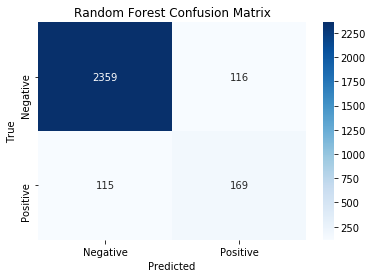

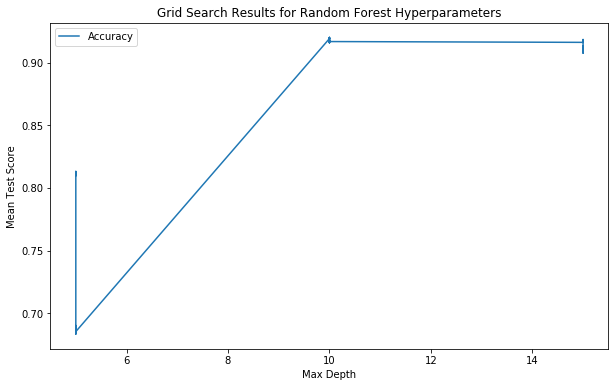

In [7]:
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True]  # Whether bootstrap samples are used when building trees
}


# Initialize RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')


# Set up GridSearchCV with accuracy as the scoring metric
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, verbose=1, n_jobs=4, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-validation Accuracy for Random Forest:", grid_search_rf.best_score_)

# Predict with the best model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate model performance
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
metrics_rf = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
specificity_rf = tn / (tn + fp)

# Print the evaluation metrics
print("Random Forest ROC AUC Score:", roc_auc_rf)
print("Random Forest Precision:", metrics_rf[0])
print("Random Forest Recall:", metrics_rf[1])
print("Random Forest F1 Score:", metrics_rf[2])
print("Random Forest Specificity:", specificity_rf)

# Plot confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the accuracy for each combination of hyperparameters
results_rf = grid_search_rf.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results_rf['param_max_depth'], results_rf['mean_test_score'], label='Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for Random Forest Hyperparameters')
plt.legend()
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.6min finished


Best Hyperparameters: {'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Best Cross-validation Accuracy: 0.9215010263642304
KNN ROC AUC Score: 0.8607525963863992
KNN Precision: 0.9021429790672774
KNN Recall: 0.9148242116708952
KNN F1 Score: 0.8976099545457779
KNN Specificity: 0.9874747474747475


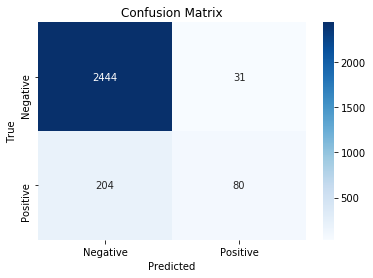

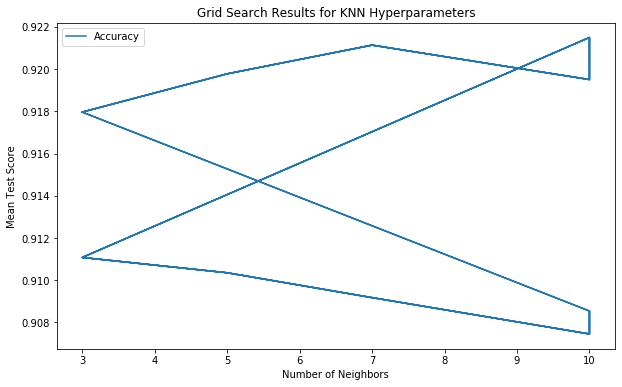

In [8]:
#KNN
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting function for prediction
    'metric': ['euclidean', 'manhattan'],  # Distance metric
    'leaf_size': [20, 30, 40],  # Leaf size for KDTree
}

# Initialize KNN model
knn = KNeighborsClassifier()  # Enable probability estimation

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)


# For KNN (best model from GridSearchCV)
yhat_proba_knn = grid_search.best_estimator_.predict_proba(X_test)

# Use the probabilities of the positive class (class 1)
roc_auc_knn = roc_auc_score(y_test, yhat_proba_knn[:, 1])

# Convert probabilities to class labels by choosing the class with the highest probability
y_pred_knn = (yhat_proba_knn[:, 1] >= 0.5).astype(int)  # Class 1 if probability >= 0.5, else class 0

# Now calculate the other metrics with the predicted class labels
metrics_knn = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
specificity_knn = tn / (tn + fp)

# Print results
print("KNN ROC AUC Score:", roc_auc_knn)
print("KNN Precision:", metrics_knn[0])
print("KNN Recall:", metrics_knn[1])
print("KNN F1 Score:", metrics_knn[2])
print("KNN Specificity:", specificity_knn)


# Plot confusion matrix (optional)
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# plot the accuracy for each combination of hyperparameters
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], label='Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for KNN Hyperparameters')
plt.legend()
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/data/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 19.3min finished


Best Hyperparameters: {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.935732879928325
ROC AUC Score: 0.8486505904111538
Precision: 0.9372060306774871
Recall: 0.9325842696629213
F1 Score: 0.9345272865451576
Specificity: 0.9543434343434344


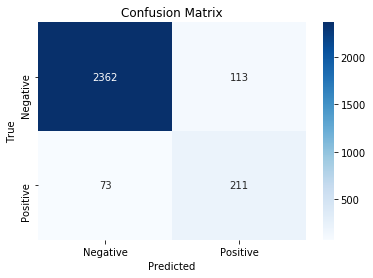

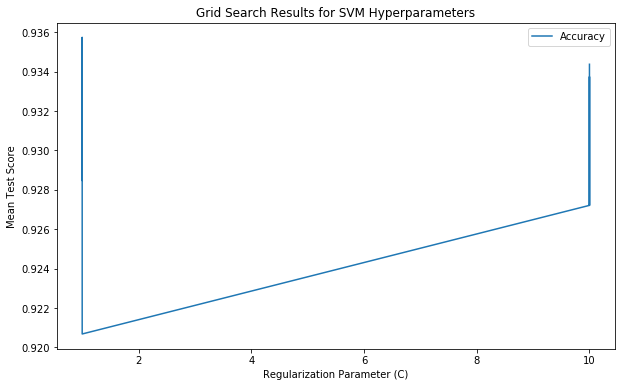

In [9]:
# SVM
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt

# X_train, X_test, y_train, y_test are numpy arrays.

# # Define the parameter grid for SVM
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
#     'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
#     'degree': [2, 3],  # Degree of the polynomial kernel function (only relevant for 'poly')
#     'coef0': [0, 0.1, 1],  # Independent term in kernel function (only relevant for 'poly' and 'sigmoid')
# }

param_grid = {
    'C': [1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Only test linear and rbf kernels
    'gamma': ['scale', 'auto'],  # Gamma values
    'degree': [2],  # Only relevant for 'poly', keeping degree 2
    'coef0': [0],  # Coef0 is only relevant for 'poly' and 'sigmoid'
}


# SVM model with class_weight='balanced'
svm = SVC(class_weight='balanced', probability=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=1, n_jobs=4, scoring='accuracy')


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Predict with the best model
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Evaluate model performance
roc_auc = roc_auc_score(y_test, y_pred_svm)
metrics_svm = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
specificity = tn / (tn + fp)

print("ROC AUC Score:", roc_auc)
print("Precision:", metrics_svm[0])
print("Recall:", metrics_svm[1])
print("F1 Score:", metrics_svm[2])
print("Specificity:", specificity)

# Plot confusion matrix (optional)
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# plot the accuracy for each combination of hyperparameters
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results['param_C'], results['mean_test_score'], label='Accuracy')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for SVM Hyperparameters')
plt.legend()
plt.show()

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed:  6.9min finished


[17:01:25] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best Hyperparameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-validation Accuracy for XGBoost: 0.9302031244030676
XGBoost ROC AUC Score: 0.7441705790297338
XGBoost Precision: 0.9229658281306369
XGBoost Recall: 0.9296846683581007
XGBoost F1 Score: 0.9241695842044091
XGBoost Specificity: 0.9777777777777777


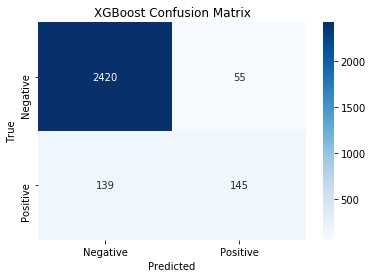

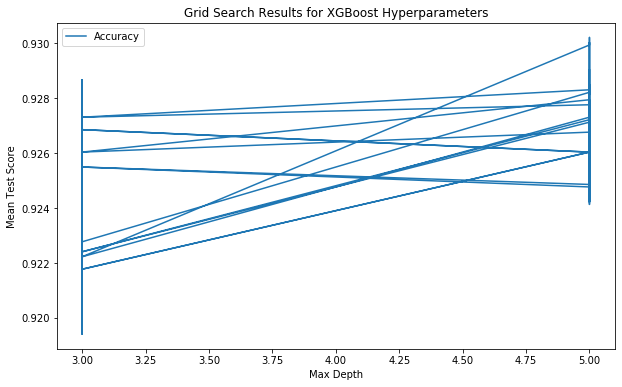

In [10]:
# XGBOOST
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1],  # learning rate 
    'max_depth': [3, 5],  # Maximum depth of a tree
    'min_child_weight': [1, 3],  # Minimum sum of instance weight (hessian) in a child
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for fitting each tree
    'n_estimators': [50, 100],  # Number of boosting rounds
    'gamma': [0, 0.1]  # Minimum loss reduction required to make a further partition
}

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(eval_metric="mlogloss", class_weight='balanced', random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, verbose=1, n_jobs=4, scoring='accuracy')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Cross-validation Accuracy for XGBoost:", grid_search_xgb.best_score_)

# Predict with the best model
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate model performance
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
metrics_xgb = precision_recall_fscore_support(y_test, y_pred_xgb, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()
specificity_xgb = tn / (tn + fp)

print("XGBoost ROC AUC Score:", roc_auc_xgb)
print("XGBoost Precision:", metrics_xgb[0])
print("XGBoost Recall:", metrics_xgb[1])
print("XGBoost F1 Score:", metrics_xgb[2])
print("XGBoost Specificity:", specificity_xgb)

# Plot confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# plot the accuracy for each combination of hyperparameters
results_xgb = grid_search_xgb.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results_xgb['param_max_depth'], results_xgb['mean_test_score'], label='Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for XGBoost Hyperparameters')
plt.legend()
plt.show()


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Best Hyperparameters for Naive Bayes: {'var_smoothing': 1e-09}
Best Cross-validation Accuracy for Naive Bayes: 0.8155359954582817
Naive Bayes ROC AUC Score: 0.630141556409162
Naive Bayes Precision: 0.855772448295734
Naive Bayes Recall: 0.8089887640449438
Naive Bayes F1 Score: 0.8290422893825552
Naive Bayes Specificity: 0.8553535353535353


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.4s finished


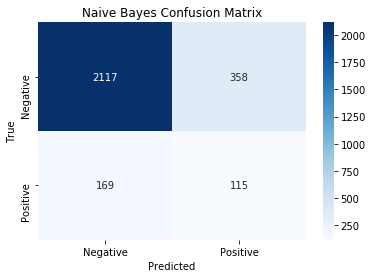

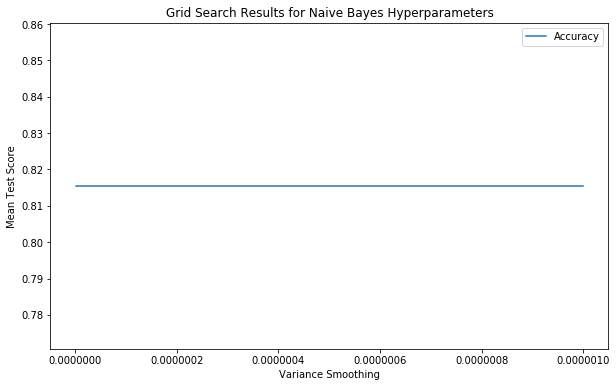

In [11]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for Gaussian Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Smoothing parameter
}

# Initialize Gaussian Naive Bayes
nb_model = GaussianNB()

# Set up GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, cv=5, verbose=1, n_jobs=4, scoring='accuracy')

# Fit the grid search to the data
grid_search_nb.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters for Naive Bayes:", grid_search_nb.best_params_)
print("Best Cross-validation Accuracy for Naive Bayes:", grid_search_nb.best_score_)

# Predict with the best model
best_nb = grid_search_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

# Evaluate model performance
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
metrics_nb = precision_recall_fscore_support(y_test, y_pred_nb, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nb).ravel()
specificity_nb = tn / (tn + fp)

print("Naive Bayes ROC AUC Score:", roc_auc_nb)
print("Naive Bayes Precision:", metrics_nb[0])
print("Naive Bayes Recall:", metrics_nb[1])
print("Naive Bayes F1 Score:", metrics_nb[2])
print("Naive Bayes Specificity:", specificity_nb)

# Plot confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# plot the accuracy for each combination of hyperparameters
results_nb = grid_search_nb.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results_nb['param_var_smoothing'], results_nb['mean_test_score'], label='Accuracy')
plt.xlabel('Variance Smoothing')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for Naive Bayes Hyperparameters')
plt.legend()
plt.show()


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/data/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:   37.7s finished


Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-validation Accuracy for Logistic Regression: 0.9135248802438134
Logistic Regression ROC AUC Score: 0.8592723004694836
Logistic Regression Precision: 0.933146480553474
Logistic Regression Recall: 0.9180862631388184
Logistic Regression F1 Score: 0.9235458508075408
Logistic Regression Specificity: 0.9333333333333333


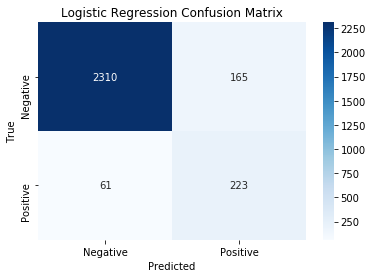

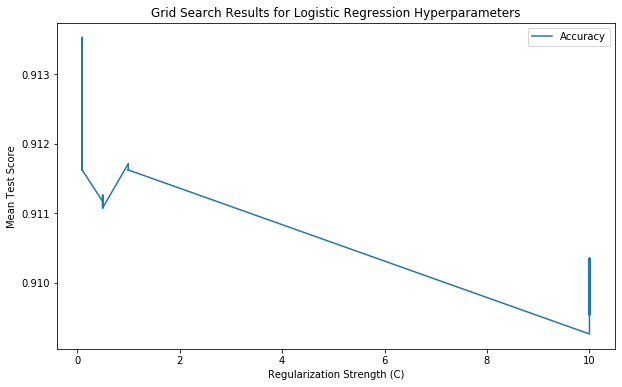

In [12]:
# Logistic Regression with L2 Regularization
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for Logistic Regression with L2 Regularization
param_grid_lr = {
    'C': [0.1, 0.5, 1.0, 10.0],  # Regularization strength (smaller 'C' means stronger regularization)
    'penalty': ['l2'],  # L2 regularization (default)
    'solver': ['lbfgs', 'liblinear'],  # Solvers that support L2 regularization
    'max_iter': [100, 1000, 10000]  # Maximum iterations for optimization
}

# Initialize Logistic Regression model
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, verbose=1, n_jobs=4, scoring='accuracy')

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Cross-validation Accuracy for Logistic Regression:", grid_search_lr.best_score_)

# Predict with the best model
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Evaluate model performance
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
metrics_lr = precision_recall_fscore_support(y_test, y_pred_lr, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
specificity_lr = tn / (tn + fp)

print("Logistic Regression ROC AUC Score:", roc_auc_lr)
print("Logistic Regression Precision:", metrics_lr[0])
print("Logistic Regression Recall:", metrics_lr[1])
print("Logistic Regression F1 Score:", metrics_lr[2])
print("Logistic Regression Specificity:", specificity_lr)

# Plot confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the accuracy for each combination of hyperparameters
results_lr = grid_search_lr.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results_lr['param_C'], results_lr['mean_test_score'], label='Accuracy')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for Logistic Regression Hyperparameters')
plt.legend()
plt.show()


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/data/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 320 out of 320 | elapsed:  9.5min finished


Best Hyperparameters for MLP: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Best Cross-validation Accuracy for MLP: 0.9346448557934636
MLP ROC AUC Score: 0.7853563807084933
MLP Precision: 0.9297006460625411
MLP Recall: 0.933671620152229
MLP F1 Score: 0.9311168812526095
MLP Specificity: 0.9721212121212122


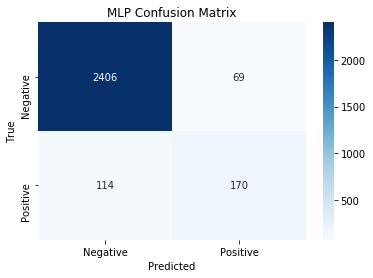

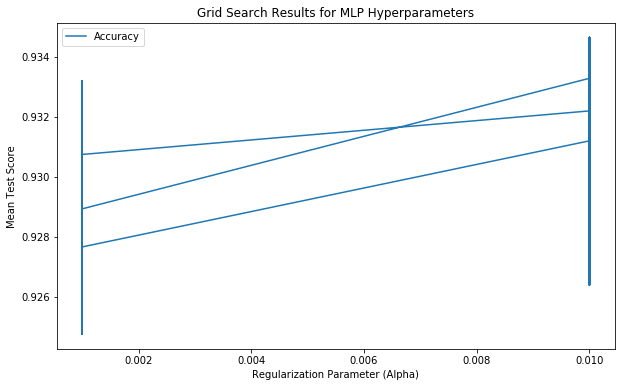

In [13]:
# MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],  # Number of neurons in hidden layers
    'activation': ['relu', 'tanh'],  # Activation function for hidden layers
    'solver': ['adam', 'lbfgs'],  # Solver for optimization
    'alpha': [0.001, 0.01],  # Regularization parameter (L2 penalty)
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
    'max_iter': [500, 1000]  # Max number of iterations for optimization
}

# Initialize MLP model
mlp_model = MLPClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=5, verbose=1, n_jobs=4, scoring='accuracy')

# Fit the grid search to the data
grid_search_mlp.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters for MLP:", grid_search_mlp.best_params_)
print("Best Cross-validation Accuracy for MLP:", grid_search_mlp.best_score_)

# Predict with the best model
best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)

# Evaluate model performance
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp)
metrics_mlp = precision_recall_fscore_support(y_test, y_pred_mlp, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_mlp).ravel()
specificity_mlp = tn / (tn + fp)

print("MLP ROC AUC Score:", roc_auc_mlp)
print("MLP Precision:", metrics_mlp[0])
print("MLP Recall:", metrics_mlp[1])
print("MLP F1 Score:", metrics_mlp[2])
print("MLP Specificity:", specificity_mlp)

# Plot confusion matrix for MLP
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the accuracy for each combination of hyperparameters
results_mlp = grid_search_mlp.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results_mlp['param_alpha'], results_mlp['mean_test_score'], label='Accuracy')
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for MLP Hyperparameters')
plt.legend()
plt.show()


87/87 [==============================] - 0s 2ms/step


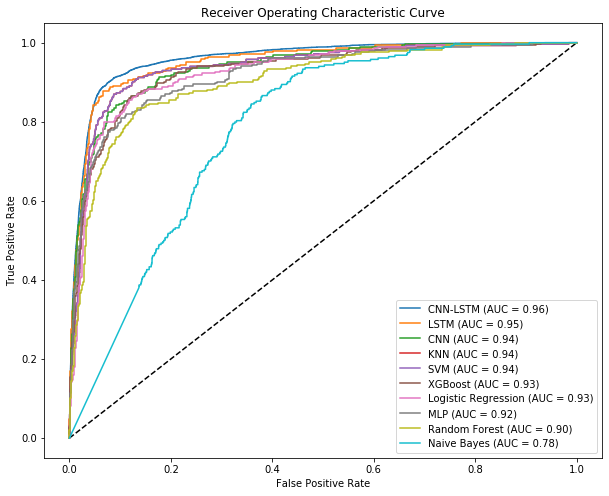

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ------------------------------- FIRST BLOCK - Random Forest -------------------------------

# For Random Forest
yhat_proba_rf = grid_search_rf.best_estimator_.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, yhat_proba_rf[:, 1])  # get FPR and TPR for Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)  # calculate AUC for Random Forest

# ------------------------------- SECOND BLOCK - MLP -------------------------------

# For MLP (best model from GridSearchCV)
yhat_proba_mlp = grid_search_mlp.best_estimator_.predict_proba(X_test)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, yhat_proba_mlp[:, 1])  # get FPR and TPR for MLP
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)  # calculate AUC for MLP

# ------------------------------- THIRD BLOCK - KNN -------------------------------

# For KNN (best model from GridSearchCV)
yhat_proba_knn = grid_search.best_estimator_.predict_proba(X_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test, yhat_proba_knn[:, 1])  # get FPR and TPR for KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)  # calculate AUC for KNN

# ------------------------------- FOURTH BLOCK - SVM -------------------------------

# For SVM (best model from GridSearchCV)
yhat_proba_svm = grid_search.best_estimator_.predict_proba(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, yhat_proba_svm[:, 1])  # get FPR and TPR for SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)  # calculate AUC for SVM

# ------------------------------- FIFTH BLOCK - XGBoost -------------------------------

# For XGBoost (best model from GridSearchCV)
yhat_proba_xgb = grid_search_xgb.best_estimator_.predict_proba(X_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, yhat_proba_xgb[:, 1])  # get FPR and TPR for XGBoost
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)  # calculate AUC for XGBoost

# ------------------------------- SIXTH BLOCK - Naive Bayes -------------------------------

# For Naive Bayes (best model from GridSearchCV)
yhat_proba_nb = grid_search_nb.best_estimator_.predict_proba(X_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test, yhat_proba_nb[:, 1])  # get FPR and TPR for Naive Bayes
roc_auc_nb = auc(fpr_nb, tpr_nb)  # calculate AUC for Naive Bayes

# ------------------------------- SEVENTH BLOCK - Logistic Regression -------------------------------

# For Logistic Regression (best model from GridSearchCV)
yhat_proba_lr = grid_search_lr.best_estimator_.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, yhat_proba_lr[:, 1])  # get FPR and TPR for Logistic Regression
roc_auc_lr = auc(fpr_lr, tpr_lr)  # calculate AUC for Logistic Regression

# ------------------------------- CNN -------------------------------

# For CNN predictions
y_pred_cnn_proba = cnn_model.predict(X_test_reshaped)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_, y_pred_cnn_proba)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# ------------------------------- LSTM -------------------------------

# For LSTM predictions
y_pred_lstm_proba = lstm_model.predict(X_test_reshaped)  # Get predicted probabilities for LSTM
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_, y_pred_lstm_proba)  # ROC curve for LSTM
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)  # Calculate AUC for LSTM

# ------------------------------- CNN-LSTM -------------------------------

# For Combined Model (LSTM + CNN)
fpr_cnn_lstm, tpr_cnn_lstm, _ = roc_curve(y_true, combined_preds)  # ROC curve for combined model
roc_auc_cnn_lstm = auc(fpr_cnn_lstm, tpr_cnn_lstm)  # Calculate AUC for combined model




# # ------------------------------- Plotting ROC Curves -------------------------------

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--') 

# Plot ROC curve for CNN-LSTM
plt.plot(fpr_cnn_lstm, tpr_cnn_lstm, label='CNN-LSTM (AUC = {:.2f})'.format(roc_auc_cnn_lstm))

# Plot ROC curve for LSTM
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (AUC = {:.2f})'.format(roc_auc_lstm))

# Plot ROC curve for CNN
plt.plot(fpr_cnn, tpr_cnn, label='CNN (AUC = {:.2f})'.format(roc_auc_cnn))

# Plot ROC curve for KNN
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))

# Plot ROC curve for SVM
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))

# Plot ROC curve for XGBoost
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))

# Plot ROC curve for Logistic Regression
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))

# # Plot ROC curve for MLP
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = {:.2f})'.format(roc_auc_mlp))

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))

# Plot ROC curve for Naive Bayes
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

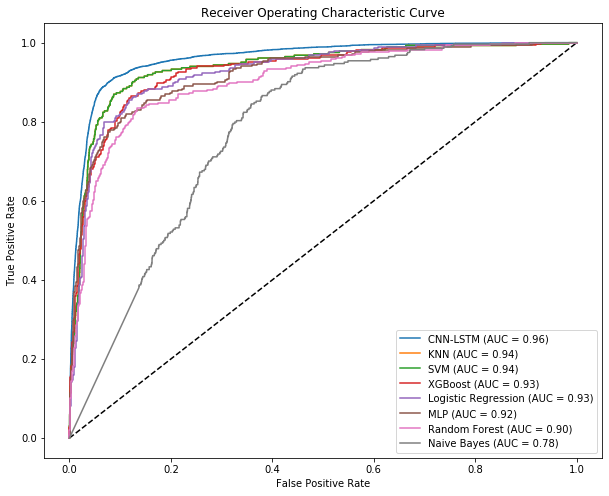

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ------------------------------- FIRST BLOCK - Random Forest -------------------------------

# For Random Forest
yhat_proba_rf = grid_search_rf.best_estimator_.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, yhat_proba_rf[:, 1])  # get FPR and TPR for Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)  # calculate AUC for Random Forest

# ------------------------------- SECOND BLOCK - MLP -------------------------------

# For MLP (best model from GridSearchCV)
yhat_proba_mlp = grid_search_mlp.best_estimator_.predict_proba(X_test)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, yhat_proba_mlp[:, 1])  # get FPR and TPR for MLP
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)  # calculate AUC for MLP

# ------------------------------- THIRD BLOCK - KNN -------------------------------

# For KNN (best model from GridSearchCV)
yhat_proba_knn = grid_search.best_estimator_.predict_proba(X_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test, yhat_proba_knn[:, 1])  # get FPR and TPR for KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)  # calculate AUC for KNN

# ------------------------------- FOURTH BLOCK - SVM -------------------------------

# For SVM (best model from GridSearchCV)
yhat_proba_svm = grid_search.best_estimator_.predict_proba(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, yhat_proba_svm[:, 1])  # get FPR and TPR for SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)  # calculate AUC for SVM

# ------------------------------- FIFTH BLOCK - XGBoost -------------------------------

# For XGBoost (best model from GridSearchCV)
yhat_proba_xgb = grid_search_xgb.best_estimator_.predict_proba(X_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, yhat_proba_xgb[:, 1])  # get FPR and TPR for XGBoost
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)  # calculate AUC for XGBoost

# ------------------------------- SIXTH BLOCK - Naive Bayes -------------------------------

# For Naive Bayes (best model from GridSearchCV)
yhat_proba_nb = grid_search_nb.best_estimator_.predict_proba(X_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test, yhat_proba_nb[:, 1])  # get FPR and TPR for Naive Bayes
roc_auc_nb = auc(fpr_nb, tpr_nb)  # calculate AUC for Naive Bayes

# ------------------------------- SEVENTH BLOCK - Logistic Regression -------------------------------

# For Logistic Regression (best model from GridSearchCV)
yhat_proba_lr = grid_search_lr.best_estimator_.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, yhat_proba_lr[:, 1])  # get FPR and TPR for Logistic Regression
roc_auc_lr = auc(fpr_lr, tpr_lr)  # calculate AUC for Logistic Regression


# ------------------------------- CNN-LSTM -------------------------------

# For Combined Model (LSTM + CNN)
fpr_cnn_lstm, tpr_cnn_lstm, _ = roc_curve(y_true, combined_preds)  # ROC curve for combined model
roc_auc_cnn_lstm = auc(fpr_cnn_lstm, tpr_cnn_lstm)  # Calculate AUC for combined model




# # ------------------------------- Plotting ROC Curves -------------------------------

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no skill)

# Plot ROC curve for CNN-LSTM
plt.plot(fpr_cnn_lstm, tpr_cnn_lstm, label='CNN-LSTM (AUC = {:.2f})'.format(roc_auc_cnn_lstm))

# Plot ROC curve for KNN
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))

# Plot ROC curve for SVM
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))

# Plot ROC curve for XGBoost
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))

# Plot ROC curve for Logistic Regression
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))

# # Plot ROC curve for MLP
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = {:.2f})'.format(roc_auc_mlp))

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))

# Plot ROC curve for Naive Bayes
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))


# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()